# (0) Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('smartphones.csv')

In [3]:
df_backup = df.copy()

# (1) Data Overview

In [4]:
df.shape

(1816, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Smartphone,1816,1816,Realme C55 8/256GB Sunshower Libre,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,1816,37,Samsung,458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,1816,383,iPhone 13,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAM,1333.0,NaN,NaN,NaN,5.96099,2.66807,1.0,4.0,6.0,8.0,12.0
Storage,1791.0,NaN,NaN,NaN,162.65215,139.411605,2.0,64.0,128.0,256.0,1000.0
Color,1816,17,Black,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Free,1816,2,Yes,1772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Price,1816.0,NaN,NaN,NaN,492.175573,398.606183,60.46,200.99,349.99,652.7175,2271.28


In [7]:
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [8]:
## Beberapa Unique Values untuk kolom kategorikal
cat_cols = df.select_dtypes('object').columns.to_list()

for col in cat_cols:
    print('Column Name: ', col)
    if df[col].nunique()>10:
        print(df[col].unique()[:10], '\n')
    else:
        print(df[col].unique(), '\n')


Column Name:  Smartphone
['Realme C55 8/256GB Sunshower Libre'
 'Samsung Galaxy M23 5G 4/128GB Azul Libre'
 'Motorola Moto G13 4/128GB Azul Lavanda Libre'
 'Xiaomi Redmi Note 11S 6/128GB Gris Libre'
 'Nothing Phone (2) 12/512GB Blanco Libre'
 'Motorola Moto E32s 4/64GB Gris Libre'
 'Nothing Phone (2) 12/256GB Blanco Libre'
 'Realme 9 Pro 5G 8/128GB Negro Libre'
 'Samsung Galaxy M23 5G 4/128GB Verde Libre'
 'Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito Libre'] 

Column Name:  Brand
['Realme' 'Samsung' 'Motorola' 'Xiaomi' 'Nothing' 'POCO' 'Apple' 'OPPO'
 'Alcatel' 'Vivo'] 

Column Name:  Model
['C55' 'Galaxy M23' 'Moto G13' 'Redmi Note 11S' 'Phone (2)' 'Moto E32s'
 '9 Pro' 'Redmi Note 12' 'M4' 'C31'] 

Column Name:  Color
['Yellow' 'Blue' 'Gray' 'White' 'Black' 'Green' 'Silver' 'Gold' 'Brown'
 'Orange'] 

Column Name:  Free
['Yes' 'No'] 



# (2) Data Cleaning

## 2.1 Data Type

In [9]:
df_clean = df.copy()

In [10]:
# Ubah nama kolom ke lowercase
df_clean.columns = df_clean.columns.str.lower()

In [11]:
# final price -> final_price
df_clean = df_clean.rename(columns={'final price': 'final_price'})

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   smartphone   1816 non-null   object 
 1   brand        1816 non-null   object 
 2   model        1816 non-null   object 
 3   ram          1333 non-null   float64
 4   storage      1791 non-null   float64
 5   color        1816 non-null   object 
 6   free         1816 non-null   object 
 7   final_price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [13]:
col_dtypes = df_clean.columns.to_series().groupby(df_clean.dtypes).groups
print("Columns grouped by Data Type:")
for col, value in col_dtypes.items():
    print(col)
    print(value, '\n')

Columns grouped by Data Type:
float64
Index(['ram', 'storage', 'final_price'], dtype='object') 

object
Index(['smartphone', 'brand', 'model', 'color', 'free'], dtype='object') 



Tipe data untuk masing-masing kolom sudah sesuai

## 2.2 Strip, Spaces, Lowercase, etc

In [14]:
def normalize_space(s: str) ->  str:
    s = re.sub(r"\s+", " ", s.strip())
    return s

In [15]:
# Menghilangkan white space value pada kolom kategorikal
cat_cols = df_clean.select_dtypes('object').columns.to_list()

for col in cat_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()

In [16]:
df_clean['brand'].value_counts()

brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Honor          27
Vivo           27
Blackview      27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Nothing         9
Google          9
Crosscall       7
Alcatel         7
CAT             6
Qubo            3
Asus            3
Doro            3
Gigaset         3
Sony            2
BQ              1
Microsoft       1
Fairphone       1
Funker          1
LG              1
Maxcom          1
Swissvoice      1
Lenovo          1
Name: count, dtype: int64

In [17]:
df_clean[df_clean['brand'] == 'Xiaomi'].head(15)

,smartphone,brand,model,ram,storage,color,free,final_price
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito Libre,Xiaomi,Redmi Note 12,8.0,256.0,Gray,Yes,329.99
13,Xiaomi Redmi Note 12 Pro 5G 8/256GB Negro Libre,Xiaomi,Redmi Note 12,8.0,256.0,Black,Yes,382.99
14,Xiaomi Redmi Note 12 Pro 5G 8/256GB Azul Libre,Xiaomi,Redmi Note 12,8.0,256.0,Blue,Yes,399.91
15,Xiaomi Redmi Note 12 4/128GB Gris Libre,Xiaomi,Redmi Note 12,4.0,128.0,Gray,Yes,249.99
17,Xiaomi Redmi Note 12 Pro 8/256GB Azul Glaciar Libre,Xiaomi,Redmi Note 12,8.0,256.0,Blue,Yes,249.26
19,Xiaomi Redmi 10C 4/64GB Gris Libre,Xiaomi,Redmi 10C,4.0,64.0,Gray,Yes,179.99
23,Xiaomi Redmi Note 11 4/128GB Gris Grafito Libre,Xiaomi,Redmi Note 11,4.0,128.0,Gray,Yes,219.99
37,Xiaomi Redmi Note 12 4/128GB Verde Libre,Xiaomi,Redmi Note 12,4.0,128.0,Green,Yes,168.90
41,Xiaomi Redmi Note 12 4/128GB Azul Libre,Xiaomi,Redmi Note 12,4.0,128.0,Blue,Yes,249.99


In [18]:
df_clean[df_clean['smartphone'].str.contains('iPhone 14')].head(15)

,smartphone,brand,model,ram,storage,color,free,final_price
16,Apple iPhone 14 128GB Medianoche Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1009.0
25,Apple iPhone 14 Pro Max 256GB Negro Espacial Libre,Apple,iPhone 14,NaN,256.0,Black,Yes,1599.0
31,Apple iPhone 14 Pro Max 128GB Negro Espacial Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1469.0
39,Apple iPhone 14 Pro Max 128GB Oro Libre,Apple,iPhone 14,NaN,128.0,Gold,Yes,1469.0
88,Apple iPhone 14 Pro 128GB Negro Espacial Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1319.0
90,Apple iPhone 14 Pro Max 256GB Oro Libre,Apple,iPhone 14,NaN,256.0,Gold,Yes,1599.0
93,Apple iPhone 14 Pro Max 256GB Plata Libre,Apple,iPhone 14,NaN,256.0,Silver,Yes,1599.0
94,Apple iPhone 14 128GB Blanco Estrella Libre,Apple,iPhone 14,NaN,128.0,White,Yes,1009.0
116,Apple iPhone 14 Plus 256GB Púrpura Libre,Apple,iPhone 14,NaN,256.0,Purple,Yes,1289.0
121,Apple iPhone 14 128GB Púrpura Libre,Apple,iPhone 14,NaN,128.0,Purple,Yes,1009.0


Insight: 
- Terlihat di sini bahwa model iPhone 14 memiliki price range yang berbeda, seperti index ke 16 dan 31. Meskipun memiliki model sama (iPhone 14), storage yang sama (128 GB), dan color yang sama (Black), tetapi memiliki harga yang cukup berbeda, yaitu 1009.0 dan 1469.0
- Jadi, kita masih perlu membuat beberapa kolom tambahan hasil ekstraksi dari kolom smartphone

In [19]:
df_clean[df_clean['smartphone'].str.contains('libre')]

,smartphone,brand,model,ram,storage,color,free,final_price
1748,Honor 7X Negro libre,Honor,7X,NaN,NaN,Black,No,468.0


Insight: 
- Di sini, harusnya libre menandakan kolom `free` berisi nilai 'Yes'. Terjadi kesalahan feature extraction karena libre tidak diawali huruf kapital. Jadi kami memutuskan untuk mnemperbaiki smartphone Honor 7X Negro libre ini menjadi 'Yes' untuk atribut `free`

In [20]:
df_clean[df_clean['smartphone'].str.contains('libre')]

,smartphone,brand,model,ram,storage,color,free,final_price
1748,Honor 7X Negro libre,Honor,7X,NaN,NaN,Black,No,468.0


In [21]:
df_clean.loc[df_clean['smartphone'].str.endswith('libre'), 'free'] = 'Yes'

In [22]:
df_clean[df_clean['smartphone'].str.contains('libre')]

,smartphone,brand,model,ram,storage,color,free,final_price
1748,Honor 7X Negro libre,Honor,7X,NaN,NaN,Black,Yes,468.0


In [23]:
df_clean[df_clean['smartphone'].str.contains('Pro')].head(10)

,smartphone,brand,model,ram,storage,color,free,final_price
7,Realme 9 Pro 5G 8/128GB Negro Libre,Realme,9 Pro,8.0,128.0,Black,Yes,352.59
9,Xiaomi Redmi Note 12 Pro 8/256GB Gris Grafito Libre,Xiaomi,Redmi Note 12,8.0,256.0,Gray,Yes,329.99
13,Xiaomi Redmi Note 12 Pro 5G 8/256GB Negro Libre,Xiaomi,Redmi Note 12,8.0,256.0,Black,Yes,382.99
14,Xiaomi Redmi Note 12 Pro 5G 8/256GB Azul Libre,Xiaomi,Redmi Note 12,8.0,256.0,Blue,Yes,399.91
17,Xiaomi Redmi Note 12 Pro 8/256GB Azul Glaciar Libre,Xiaomi,Redmi Note 12,8.0,256.0,Blue,Yes,249.26
21,Realme 11 Pro 5G 8/256GB Amoled FHD+ Curved Sunrise Beige Libre,Realme,11 Pro,8.0,256.0,White,Yes,401.60
22,POCO X5 Pro 5G 8/256GB Negro Libre + Cable USB-C a Jack,POCO,X5 Pro,8.0,256.0,Black,Yes,392.60
25,Apple iPhone 14 Pro Max 256GB Negro Espacial Libre,Apple,iPhone 14,NaN,256.0,Black,Yes,1599.00
31,Apple iPhone 14 Pro Max 128GB Negro Espacial Libre,Apple,iPhone 14,NaN,128.0,Black,Yes,1469.00
32,Realme 11 Pro Plus 5G 12/512GB Amoled FHD+ Curved Sunrise Beige Libre,Realme,11 Pro,12.0,512.0,White,Yes,521.60


## 2.3 Adding New Features (Variant, has_5g)

Di sini, kita meng-extract feature lebih awal, karena dapat membantu dalam proses imputation missing value-nya pada tahap selanjutnya

In [24]:
df_clean[df_clean['smartphone'].str.contains(r'\+')].head(10)

,smartphone,brand,model,ram,storage,color,free,final_price
21,Realme 11 Pro 5G 8/256GB Amoled FHD+ Curved Sunrise Beige Libre,Realme,11 Pro,8.0,256.0,White,Yes,401.60
22,POCO X5 Pro 5G 8/256GB Negro Libre + Cable USB-C a Jack,POCO,X5 Pro,8.0,256.0,Black,Yes,392.60
27,Realme 10 AMOLED FHD+ 8/128GB Negro Libre,Realme,10 AMOLED,8.0,128.0,Black,Yes,281.60
29,Realme 10 AMOLED FHD+ 8/128GB Blanco Libre,Realme,10 AMOLED,8.0,128.0,White,Yes,281.60
32,Realme 11 Pro Plus 5G 12/512GB Amoled FHD+ Curved Sunrise Beige Libre,Realme,11 Pro,12.0,512.0,White,Yes,521.60
33,Realme 10 AMOLED FHD+ 8/256GB Blanco Libre,Realme,10 AMOLED,8.0,256.0,White,Yes,301.60
34,POCO X5 Pro 5G 8/256GB Azul Libre + Cable USB-C a Jack,POCO,X5 Pro,8.0,256.0,Blue,Yes,391.99
35,Realme 10 AMOLED FHD+ 8/256GB Negro Libre,Realme,10 AMOLED,8.0,256.0,Black,Yes,299.00
43,Realme 11 Pro Plus 5G 12/512GB Amoled FHD+ Curved Astral Black Libre,Realme,11 Pro,12.0,512.0,Black,Yes,521.60
47,Realme Narzo 50A Prime FHD+ 4/64GB Azul Libre,Realme,Narzo 50A,4.0,64.0,Blue,Yes,172.59


Insight:
- Di sini, simbol `+` dapat digunakan untuk menjelaskan 2 hal, yaitu jenis layar (seperti -> FHD+) atau untuk menjelaskan paket bundle (seperti -> Cable USB-C)
- Kita dapat memberikan label has_accessories berdasarkan indikator `+` ini.

In [25]:
cat_cols

['smartphone', 'brand', 'model', 'color', 'free']

In [26]:
## Sebelum itu, values diubah menjadi lowercase agar mempermudah proses ekstraksi
for col in cat_cols:
    df_clean[col] = df_clean[col].str.lower()

In [27]:
import re, unicodedata
import pandas as pd
import numpy as np

# ===== helpers ===============================================================
def deaccent(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFKD', str(s or ''))
                   if not unicodedata.combining(c))

def norm(s: str) -> str:
    s = deaccent(s).lower()
    s = s.replace('\u00a0',' ').replace('\u200b',' ').replace('\u202f',' ')
    return re.sub(r'\s+', ' ', s).strip()

# urutan variant (semakin tinggi semakin “mahal”)
VARIANTS = [
    ("ultra",      5),
    ("pro max",    5),
    ("promax",     5),   
    ("max pro",    5),
    ("pro plus",   4),
    ("pro+",       4),
    ("pro",        3),
    ("max",        2),
    ("plus",       2),
    ("se",         1),
    ("mini",       1),
    ("fe",         1),
    ("lite",       1),
]

ACC_WORDS = {"cargador","cargador 25w","cargador 33w","cargador de pared",
             "cable","cable usb","cable usb-c","cable usb-c a jack",
             "wireless","charger","protector","protector pantalla",
             "funda","carcasa","auriculares","headphone","earbuds","buds"}

def pick_variant(text: str) -> tuple[str, int]:
    """
    Kembalikan (label, rank) dari sebuah teks.
    Mengutamakan pola dengan rank tertinggi yang muncul pertama kali.
    """
    t = norm(text)
    # normalisasi variasi ejaan
    t = t.replace("pro+", "pro plus").replace("promax", "pro max").replace("max pro","pro max")

    if t == 's10+':
        t = t.replace('s10+', 's10 plus')
        
    for label, rank in VARIANTS:
        # cari sebagai kata utuh; untuk 'pro max' dll tetap aman
        if re.search(rf'\b{re.escape(label)}\b', t):
            # samakan label keluaran
            out = "pro max" if label in ("promax","max pro") else ("pro plus" if label=="pro+" else label)
            return out, rank
    return "standard", 0

def has_bundle_accessories(text: str) -> bool:
    t = norm(text)
    if " + " not in t:
        return False
    tail = t.split(" + ", 1)[1]
    return any(w in tail for w in ACC_WORDS)

def has_5g(text_a: str, text_b: str="") -> bool:
    return bool(re.search(r'\b5g\b', norm(text_a))) or bool(re.search(r'\b5g\b', norm(text_b)))

# ===== main rule: prioritise Model then cross-check Smartphone ================
def infer_variant_row(row) -> pd.Series:
    model_txt = str(row.get('model') or row.get('Model') or '')
    phone_txt = str(row.get('smartphone') or row.get('Smartphone') or '')

    vm = pick_variant(model_txt)   # (label, rank)
    rm = pick_variant(phone_txt)
    # pilih yang rank-nya lebih tinggi; kalau seri berbeda tapi rank sama, pilih dari smartphone
    if vm[1] > rm[1]:
        label, rank = vm
    elif rm[1] > vm[1]:
        label, rank = rm
    else:
        # sama rank → prefer dari smartphone (lebih lengkap)
        label, rank = rm

    return pd.Series({
        "variant": label,                 # 'pro', 'ultra', 'standard', ...
        "variant_rank": rank,            # untuk ordinal encoding
        "has_5g": has_5g(phone_txt, model_txt),
        "has_bundle_accessories": has_bundle_accessories(phone_txt),
    })

# ===== apply ke DataFrame =====================================================
feat = df_clean.apply(infer_variant_row, axis=1)
df_clean = pd.concat([df_clean, feat], axis=1)

In [28]:
# Perbaikan minor pada beberapa tipe smartphone
df_clean.loc[df_clean['smartphone'].str.contains('iphone se 2022'), 'model'] = 'iphone se (gen 3)'
df_clean.loc[df_clean['smartphone'].str.contains('iphone se 2020'), 'model'] = 'iphone se (gen 2)'
df_clean.loc[(df_clean['model'].str.contains('11') & (df_clean['brand'] == 'apple')), 'model'] = 'iphone 11'

df_clean.loc[(df_clean['model'].str.contains('flip3') & (df_clean['brand'] == 'samsung')), 'model'] = 'galaxy z flip 3'
df_clean.loc[(df_clean['model'].str.contains('fold3') & (df_clean['brand'] == 'samsung')), 'model'] = 'galaxy z fold 3'

In [29]:
df_clean[df_clean['smartphone'].str.contains('iphone se')]

,smartphone,brand,model,ram,storage,color,free,final_price,variant,variant_rank,has_5g,has_bundle_accessories
330,apple iphone se 2022 128gb blanco estrella libre,apple,iphone se (gen 3),NaN,128.0,white,yes,621.60,se,1,False,False
535,apple iphone se 2022 256gb (product) red libre,apple,iphone se (gen 3),NaN,256.0,red,yes,731.60,se,1,False,False
569,apple iphone se 2022 256gb blanco estrella libre,apple,iphone se (gen 3),NaN,256.0,white,yes,701.61,se,1,False,False
762,apple iphone se 64 gb medianoche libre,apple,iphone se,NaN,64.0,black,yes,439.00,se,1,False,False
790,apple iphone se 64gb medianoche libre,apple,iphone se,NaN,64.0,black,yes,439.00,se,1,False,False
868,apple iphone se 2022 64gb blanco estrella libre,apple,iphone se (gen 3),NaN,64.0,white,yes,529.00,se,1,False,False
905,apple iphone se 2022 64gb medianoche libre,apple,iphone se (gen 3),NaN,64.0,black,yes,529.00,se,1,False,False
1078,apple iphone se 2022 256gb medianoche libre,apple,iphone se (gen 3),NaN,256.0,black,yes,701.61,se,1,False,False
1252,apple iphone se 128gb (product)red libre,apple,iphone se,NaN,128.0,red,yes,311.38,se,1,False,False


In [30]:
df_clean.head(10)

,smartphone,brand,model,ram,storage,color,free,final_price,variant,variant_rank,has_5g,has_bundle_accessories
0,realme c55 8/256gb sunshower libre,realme,c55,8.0,256.0,yellow,yes,231.60,standard,0,False,False
1,samsung galaxy m23 5g 4/128gb azul libre,samsung,galaxy m23,4.0,128.0,blue,yes,279.00,standard,0,True,False
2,motorola moto g13 4/128gb azul lavanda libre,motorola,moto g13,4.0,128.0,blue,yes,179.01,standard,0,False,False
3,xiaomi redmi note 11s 6/128gb gris libre,xiaomi,redmi note 11s,6.0,128.0,gray,yes,279.99,standard,0,False,False
4,nothing phone (2) 12/512gb blanco libre,nothing,phone (2),12.0,512.0,white,yes,799.00,standard,0,False,False
5,motorola moto e32s 4/64gb gris libre,motorola,moto e32s,4.0,64.0,gray,yes,148.52,standard,0,False,False
6,nothing phone (2) 12/256gb blanco libre,nothing,phone (2),12.0,256.0,white,yes,699.00,standard,0,False,False
7,realme 9 pro 5g 8/128gb negro libre,realme,9 pro,8.0,128.0,black,yes,352.59,pro,3,True,False
8,samsung galaxy m23 5g 4/128gb verde libre,samsung,galaxy m23,4.0,128.0,green,yes,279.00,standard,0,True,False
9,xiaomi redmi note 12 pro 8/256gb gris grafito libre,xiaomi,redmi note 12,8.0,256.0,gray,yes,329.99,pro,3,False,False


In [31]:
# atur urutan dataframe
new_column_order = ['smartphone', 'brand', 'model', 'variant', 'variant_rank', 'ram', 'storage', 'color', 'has_5g', 'has_bundle_accessories', 'free', 'final_price']
df_clean = df_clean[new_column_order]

In [32]:
df_clean.head(10)

,smartphone,brand,model,variant,variant_rank,ram,storage,color,has_5g,has_bundle_accessories,free,final_price
0,realme c55 8/256gb sunshower libre,realme,c55,standard,0,8.0,256.0,yellow,False,False,yes,231.60
1,samsung galaxy m23 5g 4/128gb azul libre,samsung,galaxy m23,standard,0,4.0,128.0,blue,True,False,yes,279.00
2,motorola moto g13 4/128gb azul lavanda libre,motorola,moto g13,standard,0,4.0,128.0,blue,False,False,yes,179.01
3,xiaomi redmi note 11s 6/128gb gris libre,xiaomi,redmi note 11s,standard,0,6.0,128.0,gray,False,False,yes,279.99
4,nothing phone (2) 12/512gb blanco libre,nothing,phone (2),standard,0,12.0,512.0,white,False,False,yes,799.00
5,motorola moto e32s 4/64gb gris libre,motorola,moto e32s,standard,0,4.0,64.0,gray,False,False,yes,148.52
6,nothing phone (2) 12/256gb blanco libre,nothing,phone (2),standard,0,12.0,256.0,white,False,False,yes,699.00
7,realme 9 pro 5g 8/128gb negro libre,realme,9 pro,pro,3,8.0,128.0,black,True,False,yes,352.59
8,samsung galaxy m23 5g 4/128gb verde libre,samsung,galaxy m23,standard,0,4.0,128.0,green,True,False,yes,279.00
9,xiaomi redmi note 12 pro 8/256gb gris grafito libre,xiaomi,redmi note 12,pro,3,8.0,256.0,gray,False,False,yes,329.99


In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   smartphone              1816 non-null   object 
 1   brand                   1816 non-null   object 
 2   model                   1816 non-null   object 
 3   variant                 1816 non-null   object 
 4   variant_rank            1816 non-null   int64  
 5   ram                     1333 non-null   float64
 6   storage                 1791 non-null   float64
 7   color                   1816 non-null   object 
 8   has_5g                  1816 non-null   bool   
 9   has_bundle_accessories  1816 non-null   bool   
 10  free                    1816 non-null   object 
 11  final_price             1816 non-null   float64
dtypes: bool(2), float64(3), int64(1), object(6)
memory usage: 145.6+ KB


## 2.4 Duplicate Values

In [34]:
df_clean.duplicated().sum()

np.int64(0)

Insight:
- Tidak ditemukan adanya duplicated values

## 2.5 Missing Values

In [35]:
df_clean.isna().sum().rename('Number of Missing Values').to_frame()

,Number of Missing Values
smartphone,0
brand,0
model,0
variant,0
variant_rank,0
ram,483
storage,25
color,0
has_5g,0
has_bundle_accessories,0


In [36]:
(df_clean.isna().sum()/len(df_clean)*100.0).rename('Number of Missing Values (%)').to_frame()

,Number of Missing Values (%)
smartphone,0.000000
brand,0.000000
model,0.000000
variant,0.000000
variant_rank,0.000000
ram,26.596916
storage,1.376652
color,0.000000
has_5g,0.000000
has_bundle_accessories,0.000000


Insight:
- Ditemukan terdapat missing value sebanyak 26.6% pada kolom RAM dan 1.3% pada Storage
- Approach yang dapat digunakan di sini adalah:
    1) mencari manual beberapa informasi RAM dari internet, seperti Model iphone 14 yang memiliki 6GB RAM, atau
    2) menggunakan imputasi berdasarkan median dengan pengelompokkan per grup, seperti brand, model, dan variant.

In [37]:
df_clean[(df_clean.isna().any(axis=1) == True)]['brand'].value_counts()

brand
apple        292
samsung      151
huawei        11
motorola       5
oneplus        4
xiaomi         4
spc            2
zte            2
sony           2
tcl            1
cat            1
bq             1
blackview      1
doro           1
fairphone      1
nokia          1
ulefone        1
crosscall      1
honor          1
Name: count, dtype: int64

- Di sini, smartphone Apple dan Samsung memiliki jumlah missing values terbanyak. Dengan memprioritaskan missing values imputation berbasis data dari web internet, maka diharapkan datasetnya menjadi lebih akurat dan faktual.

### 2.5.1 Helper

In [38]:
def _deaccent(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFKD', str(s or ''))
                   if not unicodedata.combining(c))

def _norm(s: str) -> str:
    s = _deaccent(s).lower()
    s = s.replace('\u00a0',' ').replace('\u200b',' ').replace('\u202f',' ')
    return re.sub(r'\s+', ' ', s).strip()

### 2.5.2 Apple - RAM

In [39]:
# Apple - Iphone
df_clean.loc[df_clean.isna().any(axis=1) & (df_clean['brand'] == 'apple'), ['brand', 'model', 'variant', 'variant_rank', 'ram', 'storage']].drop_duplicates().sort_values(by=['variant_rank', 'storage'], ascending=False)

,brand,model,variant,variant_rank,ram,storage
656,apple,iphone 14,pro max,5,NaN,1000.0
1169,apple,iphone 13,pro max,5,NaN,1000.0
315,apple,iphone 14,pro max,5,NaN,512.0
643,apple,iphone 13,pro max,5,NaN,512.0
770,apple,iphone 12,pro max,5,NaN,512.0
1068,apple,iphone 11,pro max,5,NaN,512.0
25,apple,iphone 14,pro max,5,NaN,256.0
207,apple,iphone 12,pro max,5,NaN,256.0
524,apple,iphone 13,pro max,5,NaN,256.0
539,apple,iphone 11,pro max,5,NaN,256.0


Sumber: https://iosref.com/ram-processor

In [40]:
APPLE_RAM_MAP = {
    # 15
    ('iphone 15', 'pro max'): 8,
    ('iphone 15', 'pro')    : 8,
    ('iphone 15', 'plus')   : 6,
    ('iphone 15', 'standard'): 6,

    # 14
    ('iphone 14', 'pro max'): 6,
    ('iphone 14', 'pro')    : 6,
    ('iphone 14', 'plus')   : 6,
    ('iphone 14', 'standard'): 6,

    # 13
    ('iphone 13', 'pro max'): 6,
    ('iphone 13', 'pro')    : 6,
    ('iphone 13', 'mini')   : 4,
    ('iphone 13', 'standard'): 4,

    # 12
    ('iphone 12', 'pro max'): 6,
    ('iphone 12', 'pro')    : 6,
    ('iphone 12', 'mini')   : 4,
    ('iphone 12', 'standard'): 4,

    # 11 (pro/pro max = 4 GB)
    ('iphone 11', 'pro max'): 4,
    ('iphone 11', 'pro')    : 4,
    ('iphone 11', 'standard'): 4,

    # XS family
    ('iphone xs','max'): 4,
    ('iphone xs','standard')    : 4,

    # X / XR
    ('iphone xr','standard'): 3,
    ('iphone x','standard') : 3,

    # 8 / 8 Plus
    ('iphone 8','plus')   : 3,
    ('iphone 8','standard')    : 2,

    # 7 / 7 Plus
    ('iphone 7','plus')   : 3,
    ('iphone 7','standard')    : 2,

    # 6s / 6s Plus / 6 / 6 Plus
    ('iphone 6s','plus')  : 2,
    ('iphone 6s','standard')   : 2,
    ('iphone 6','plus')   : 1,
    ('iphone 6','standard')    : 1,

    # 5s
    ('iphone 5s','standard')   : 1,

    # SE (sesuai pairing-mu)
    ('iphone se','se')         : 2,  # 2016
    ('iphone se (gen 2)','se') : 3,  # 2020
    ('iphone se (gen 3)','se') : 4,  # 2022
}

mask_apple_na = (df_clean['brand'] == 'apple') & (df_clean['ram'].isna())
keys = list(zip(df_clean.loc[mask_apple_na, 'model'],
                df_clean.loc[mask_apple_na, 'variant']))

df_clean.loc[mask_apple_na, 'ram'] = [
    APPLE_RAM_MAP.get(k, np.nan) for k in keys
]

### 2.5.3 Samsung - RAM

In [41]:
# Samsung
df_clean.loc[df_clean.isna().any(axis=1) & (df_clean['brand'] == 'samsung'), ['brand', 'model', 'variant', 'variant_rank', 'ram', 'storage']].drop_duplicates().sort_values(by=['variant_rank', 'storage'], ascending=False)

,brand,model,variant,variant_rank,ram,storage
649,samsung,galaxy s23,ultra,5,NaN,1000.0
127,samsung,galaxy s23,ultra,5,NaN,512.0
1155,samsung,galaxy s21,ultra,5,NaN,512.0
1784,samsung,galaxy s22,ultra,5,NaN,512.0
141,samsung,galaxy s23,ultra,5,NaN,256.0
478,samsung,galaxy s21,ultra,5,NaN,256.0
1162,samsung,galaxy s22,ultra,5,NaN,256.0
424,samsung,galaxy s21,ultra,5,NaN,128.0
1780,samsung,s10+,plus,2,NaN,1000.0
241,samsung,galaxy s23,plus,2,NaN,512.0


Sumber: https://www.gsmarena.com/ 
- s23 ultra: 256GB 12GB RAM, 512GB 12GB RAM, 1TB 12GB RAM
- s22 ultra: 128GB 8GB RAM, 256GB 12GB RAM, 512GB 12GB RAM, 1TB 12GB RAM
- s21 ultra: 128GB 8GB RAM, 256GB 12GB RAM, 512GB 12GB RAM


- s23 plus: 256GB 8GB RAM, 512GB 8GB RAM
- s22 plus: 128GB 8GB RAM, 256GB 8GB RAM
- s21 plus: 128GB 8GB RAM, 256GB 8GB RAM
- s10+: 128GB 6GB RAM, 512GB 8GB RAM, 1TB 12GB RAM
- note10 plus: 256GB 12GB RAM, 512GB 12GB RAM
- s8 plus: 64GB 4GB RAM, 128GB 6GB RAM


- z fold 3: 256GB 12GB RAM, 512GB 12GB RAM
- z flip 3: 128GB 8GB RAM, 256GB 8GB RAM
- s23 standard: 128GB 8GB RAM, 256GB 8GB RAM, 512GB 8GB RAM
- s22 standard: 128GB 8GB RAM, 256GB 8GB RAM
- s21 standard: 128GB 6GB RAM, 256GB 8GB RAM
- s10e: 128GB 6GB RAM, 256GB 8GB RAM
- s8 standard: 64GB 4GB RAM
- note 10 standard: 256GB 8GB RAM
- note 9: 128GB 6GB RAM, 512GB 8GB RAM
- note 8: 64GB 6GB RAM, 128GB 6GB RAM, 256GB 6GB RAM


- a52: 128GB 6GB RAM, 256GB 8GB RAM
- m12 standard: 32GB 3GB RAM, 64GB 4GB RAM, 128GB 4GB RAM
- a12 standard: 32GB 3GB RAM, 64GB 4GB RAM, 128GB 4GB RAM


In [42]:
# (model_key, variant, storage_float) -> RAM (GB) 
SAMSUNG_RAM_MAP = {
    # --- S series ---
    ('s23', 'ultra', 256.0): 12,  
    ('s23', 'ultra', 512.0): 12,
    ('s23', 'ultra', 1000.0): 12,

    ('s23', 'plus', 256.0): 8,
    ('s23', 'plus', 512.0): 8,

    ('s23', 'standard', 128.0): 8,
    ('s23', 'standard', 256.0): 8,
    ('s23', 'standard', 512.0): 8,

    ('s22', 'ultra', 128.0): 8,
    ('s22', 'ultra', 256.0): 12,
    ('s22', 'ultra', 512.0): 12,
    ('s22', 'ultra', 1000.0): 12,

    ('s22', 'plus', 128.0): 8,
    ('s22', 'plus', 256.0): 8,

    ('s22', 'standard', 128.0): 8,
    ('s22', 'standard', 256.0): 8,

    ('s21', 'ultra', 128.0): 8,
    ('s21', 'ultra', 256.0): 12,
    ('s21', 'ultra', 512.0): 12,

    ('s21', 'plus', 128.0): 8,
    ('s21', 'plus', 256.0): 8,

    ('s21', 'standard', 128.0): 8,
    ('s21', 'standard', 256.0): 8,

    ('s10', 'standard', 128.0): 6,
    ('s10', 'standard', 512.0): 8,

    ('s10e', 'standard', 128.0): 6,
    ('s10e', 'standard', 256.0): 8,

    ('s10+', 'plus', 128.0): 6,
    ('s10+', 'plus', 512.0): 8,
    ('s10+', 'plus', 1000.0): 12,

    ('s8', 'plus', 64.0): 4,
    ('s8', 'plus', 128.0): 6,
    ('s8', 'standard', 64.0): 4,

    # --- Note series ---
    ('note10', 'plus', 256.0): 12,
    ('note10', 'plus', 512.0): 12,
    ('note10', 'standard', 256.0): 8,

    ('note9', 'standard', 128.0): 6,
    ('note9', 'standard', 512.0): 8,

    ('note8', 'standard', 64.0): 6,
    ('note8', 'standard', 128.0): 6,
    ('note8', 'standard', 256.0): 6,

    # --- Fold/Flip ---
    ('z fold 3', 'standard', 256.0): 12,
    ('z fold 3', 'standard', 512.0): 12,

    ('z flip 3', 'standard', 128.0): 8,
    ('z flip 3', 'standard', 256.0): 8,

    # --- A/M series ---
    ('a52', 'standard', 128.0): 6,
    ('a52', 'standard', 256.0): 8,

    ('m12', 'standard', 32.0): 3,
    ('m12', 'standard', 64.0): 4,
    ('m12', 'standard', 128.0): 4,

    ('a12', 'standard', 32.0): 3,
    ('a12', 'standard', 64.0): 4,
    ('a12', 'standard', 128.0): 4,
}


In [43]:
def samsung_model_key(model_text: str) -> str | None:
    m = (model_text or "").lower()

    # nama khusus
    if re.search(r'\bz\s*fold\s*3\b', m): return 'z fold 3'
    if re.search(r'\bz\s*flip\s*3\b', m): return 'z flip 3'
    if re.search(r'\bs10e\b', m):        return 's10e'
    if re.search(r'\bs10\+|\bs10 plus\b', m): return 's10+'

    # s-series (s23, s22, s21, s8, ...)
    g = re.search(r'\bs(\d{1,2})\b', m)
    if g: return f"s{g.group(1)}"

    # note-series
    g = re.search(r'\bnote\s*(\d{1,2})\b', m)
    if g: return f"note{g.group(1)}"

    # a/m-series
    g = re.search(r'\ba(\d{1,3})\b', m)
    if g: return f"a{g.group(1)}"
    g = re.search(r'\bm(\d{1,3})\b', m)
    if g: return f"m{g.group(1)}"

    return None


In [44]:
def impute_ram_samsung_simple(df: pd.DataFrame, mapping: dict) -> pd.Series:
    """
    Isi RAM untuk baris Samsung yang RAM-nya NaN, pakai mapping:
    (model_key, variant, storage_float) -> RAM_GB
    - model_key diambil dari kolom 'model' lewat samsung_model_key()
    - variant diambil dari kolom 'variant'
    - storage harus non-null (float; 1TB=1000.0)
    """
    out = df['ram'].copy()
    m = (df['brand'] == 'samsung') & out.isna() & df['storage'].notna()

    model_key = df['model'].apply(samsung_model_key)
    variant   = df['variant'].astype(str).str.lower()
    storage   = df['storage'].astype(float)

    for idx in df.index[m]:
        key = (model_key[idx], variant[idx], storage[idx])
        out.at[idx] = mapping.get(key, np.nan)  # biarkan NaN kalau tidak ada di map

    return out


In [45]:
filled = impute_ram_samsung_simple(df_clean, SAMSUNG_RAM_MAP)
mask_apply = (df_clean['brand']=='samsung') & df_clean['ram'].isna() & df_clean['storage'].notna()
df_clean.loc[mask_apply, 'ram'] = filled.loc[mask_apply]

In [46]:
display(df_clean.loc[(df_clean['brand']=='samsung') & (df_clean['ram'].isna()), ['smartphone','model','variant','storage','ram', 'final_price']])

,smartphone,model,variant,storage,ram,final_price
565,samsung galaxy s9 negro libre importación eu,galaxy s9,standard,NaN,NaN,410.04
786,samsung galaxy s10e negro libre,s10e,standard,NaN,NaN,506.39
828,samsung galaxy s10e verde libre,s10e,standard,NaN,NaN,199.00
1174,samsung galaxy s10e azul libre versión importada eu,s10e,standard,NaN,NaN,203.99
1206,samsung galaxy s9 púrpura libre importación eu,galaxy s9,standard,NaN,NaN,399.00
1267,samsung galaxy j5 2017 negro libre,galaxy j5,standard,NaN,NaN,107.90
1291,samsung galaxy s10e blanco libre,s10e,standard,NaN,NaN,199.00
1546,samsung galaxy a9 negro libre versión española,galaxy a9,standard,NaN,NaN,482.74
1781,samsung galaxy s10e amarillo libre,s10e,standard,NaN,NaN,224.00


In [47]:
df_clean.isna().sum()

smartphone                 0
brand                      0
model                      0
variant                    0
variant_rank               0
ram                       49
storage                   25
color                      0
has_5g                     0
has_bundle_accessories     0
free                       0
final_price                0
dtype: int64

In [48]:
df_clean[df_clean['ram'].isna()].groupby(['brand', 'model'])['brand'].size()

brand      model       
blackview  bv4900          1
bq         aquaris c       1
cat        b35             1
crosscall  x3              1
doro       8050            1
fairphone  3+              1
honor      7x              1
huawei     mate 10         2
           mate 20         3
           p smart 2019    2
           p20             2
           p8              2
motorola   moto g5s        4
           one zoom        1
nokia      7               1
oneplus    6t              1
           7               3
samsung    galaxy a9       1
           galaxy j5       1
           galaxy s9       2
           s10e            5
sony       xperia l1       1
           xperia xz2      1
spc        jasper 2        1
           smart max 2     1
tcl        403             1
ulefone    note 7          1
xiaomi     mi 8            1
           mi mix          1
           redmi go        1
           redmi note 5    1
zte        blade a31       2
Name: brand, dtype: int64

In [49]:
df_clean[df_clean['storage'].isna()].groupby(['brand', 'model'])['brand'].size()

brand      model     
crosscall  x3            1
honor      7x            1
huawei     mate 10       1
           mate 20       2
           p20           2
           p8            2
motorola   moto g5s      4
nokia      7             1
samsung    galaxy a9     1
           galaxy j5     1
           galaxy s9     2
           s10e          5
sony       xperia xz2    1
spc        jasper 2      1
Name: brand, dtype: int64

- Beberapa model smartphone yang tidak dapat ditemukan informasinya mengenai RAM dan/atau storage, maka kita akan menggunakan imputasi dengan pendekatan median berdasarkan pengelompokan beberapa fitur.

### 2.5.4 Others - RAM & Storage

In [50]:
df_clean.describe()

,variant_rank,ram,storage,final_price
count,1816.000000,1767.000000,1791.000000,1816.000000
mean,0.900330,5.912847,162.652150,492.175573
std,1.474664,2.645813,139.411605,398.606183
min,0.000000,1.000000,2.000000,60.460000
25%,0.000000,4.000000,64.000000,200.990000
50%,0.000000,6.000000,128.000000,349.990000
75%,2.000000,8.000000,256.000000,652.717500
max,5.000000,12.000000,1000.000000,2271.280000


In [51]:
def impute_median_hierarchical(df, kolom):
    """
    Mengisi NaN pada kolom numerik (mis. 'ram' atau 'storage') dengan median:
      1) median per (brand, model, variant)
      2) median per (brand, model)
      3) median per (brand)
      4) median global (seluruh data)
    """
    # Level 1: brand + model + variant
    med1 = df.groupby(['brand','model','variant'])[kolom].transform('median')
    df[kolom] = df[kolom].fillna(med1)

    # Level 2: brand + model
    med2 = df.groupby(['brand','model'])[kolom].transform('median')
    df[kolom] = df[kolom].fillna(med2)

    # Level 3: brand
    med3 = df.groupby(['brand'])[kolom].transform('median')
    df[kolom] = df[kolom].fillna(med3)

    # Level 4: global
    med_global = df[kolom].median()
    df[kolom] = df[kolom].fillna(med_global)


In [52]:
# Imputasi RAM
impute_median_hierarchical(df_clean, 'ram')

# Imputasi STORAGE
impute_median_hierarchical(df_clean, 'storage')


In [53]:
df_clean.isna().sum().rename('Number of Missing Values').to_frame()

,Number of Missing Values
smartphone,0
brand,0
model,0
variant,0
variant_rank,0
ram,0
storage,0
color,0
has_5g,0
has_bundle_accessories,0


Insight:
- Semua missing values telah berhasil diimputasi dengan menggunakan 2 pendekatan. Pendekatan pertama (from website) diprioritaskan karena akan memberikan hasil yang lebih akurat. Pendekatan kedua (hierarchical median imputation) digunakan sebagai cara alternatif dengan kekurangan pada nilai imputasi yang tidak seakurat pendekatan pertama. 

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   smartphone              1816 non-null   object 
 1   brand                   1816 non-null   object 
 2   model                   1816 non-null   object 
 3   variant                 1816 non-null   object 
 4   variant_rank            1816 non-null   int64  
 5   ram                     1816 non-null   float64
 6   storage                 1816 non-null   float64
 7   color                   1816 non-null   object 
 8   has_5g                  1816 non-null   bool   
 9   has_bundle_accessories  1816 non-null   bool   
 10  free                    1816 non-null   object 
 11  final_price             1816 non-null   float64
dtypes: bool(2), float64(3), int64(1), object(6)
memory usage: 145.6+ KB


In [55]:
df_clean.head()

,smartphone,brand,model,variant,variant_rank,ram,storage,color,has_5g,has_bundle_accessories,free,final_price
0,realme c55 8/256gb sunshower libre,realme,c55,standard,0,8.0,256.0,yellow,False,False,yes,231.60
1,samsung galaxy m23 5g 4/128gb azul libre,samsung,galaxy m23,standard,0,4.0,128.0,blue,True,False,yes,279.00
2,motorola moto g13 4/128gb azul lavanda libre,motorola,moto g13,standard,0,4.0,128.0,blue,False,False,yes,179.01
3,xiaomi redmi note 11s 6/128gb gris libre,xiaomi,redmi note 11s,standard,0,6.0,128.0,gray,False,False,yes,279.99
4,nothing phone (2) 12/512gb blanco libre,nothing,phone (2),standard,0,12.0,512.0,white,False,False,yes,799.00


In [56]:
df_clean[['brand', 'model']].to_csv('phone_brand_model_list.csv')

# (3) Exploratory Data Analysis

## 3.1 Distribusi Final Price

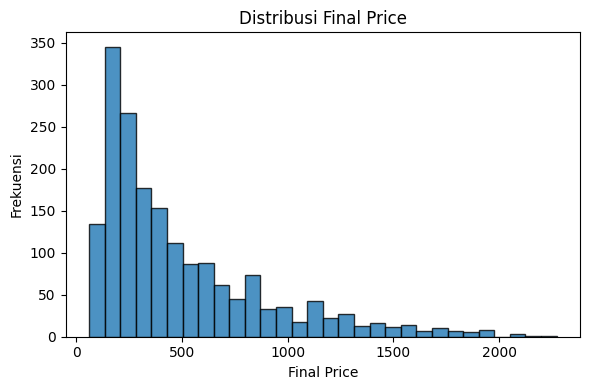

In [57]:
plt.figure(figsize=(6,4))
df_clean["final_price"].plot(kind="hist", bins=30, edgecolor="black", alpha=0.8)
plt.title("Distribusi Final Price")
plt.xlabel("Final Price"); plt.ylabel("Frekuensi")
plt.tight_layout(); plt.show()

Insight: Distribusi harga cenderung terkonsentrasi di rentang menengah dengan ekor ke kanan (produk high-end).

## 3.2 Brand Terbanyak

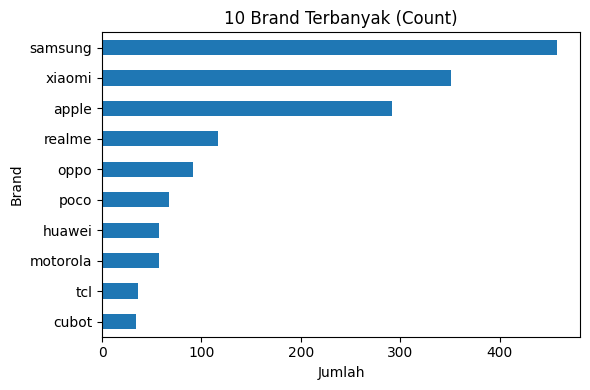

In [58]:
top_brand = df_clean["brand"].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(6,4))
top_brand.plot(kind="barh")
plt.title("10 Brand Terbanyak (Count)")
plt.xlabel("Jumlah"); plt.ylabel("Brand")
plt.tight_layout(); plt.show()

Insight: Brand teratas mendominasi jumlah listing, menunjukkan fokus pasar/penjual pada merek populer.

## 3.3 Warna Terbanyak

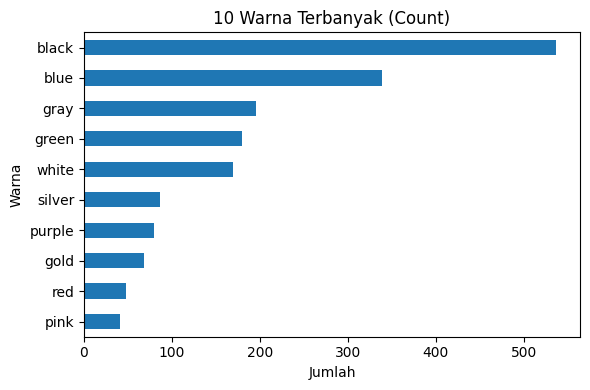

In [59]:
top_brand = df_clean["color"].value_counts().head(10).sort_values(ascending=True)
plt.figure(figsize=(6,4))
top_brand.plot(kind="barh")
plt.title("10 Warna Terbanyak (Count)")
plt.xlabel("Jumlah"); plt.ylabel("Warna")
plt.tight_layout(); plt.show()

Insight: Smartphone berwarna hitam berhasil mendominasi pada listing.

## 3.4 RAM vs Final Price

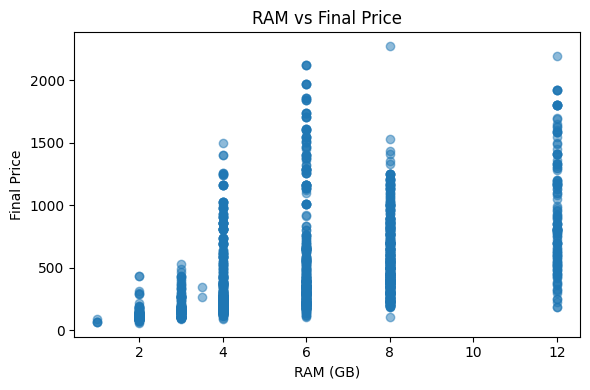

In [60]:
plt.figure(figsize=(6,4))
plt.scatter(df_clean["ram"], df_clean["final_price"], alpha=0.5)
plt.title("RAM vs Final Price")
plt.xlabel("RAM (GB)"); plt.ylabel("Final Price")
plt.tight_layout(); plt.show()

Insight: Ada tren positif — semakin besar RAM, harga cenderung meningkat.

## 3.5 Storage vs Final Price

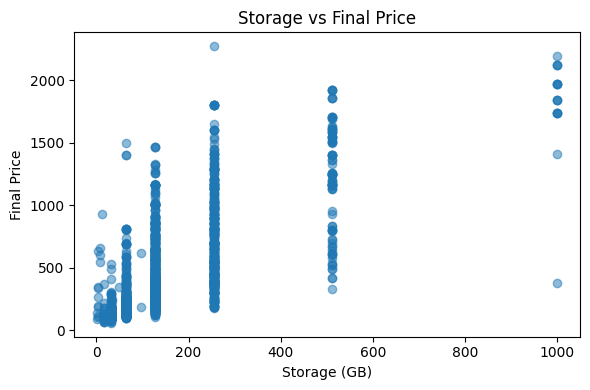

In [61]:
plt.figure(figsize=(6,4))
plt.scatter(df_clean["storage"], df_clean["final_price"], alpha=0.5)
plt.title("Storage vs Final Price")
plt.xlabel("Storage (GB)"); plt.ylabel("Final Price")
plt.tight_layout(); plt.show()

Insight: Semakin besar Storage, harga juga cenderung lebih tinggi.

## 3.6 Top 10 Rata-Rata Final Price per Brand

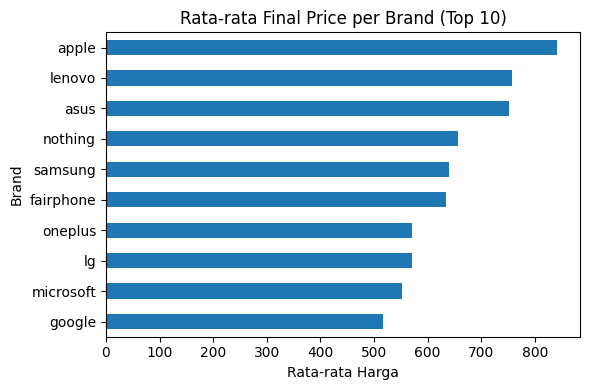

In [62]:
avg_price_brand = (
    df_clean.groupby("brand")["final_price"]
    .mean().sort_values(ascending=False).head(10).sort_values(ascending=True)
)
plt.figure(figsize=(6,4))
avg_price_brand.plot(kind="barh")
plt.title("Rata-rata Final Price per Brand (Top 10)")
plt.xlabel("Rata-rata Harga"); plt.ylabel("Brand")
plt.tight_layout(); plt.show()

Insight: Terlihat perbedaan positioning harga antar brand; beberapa brand konsisten di segmen harga lebih tinggi.

## 3.7 Percentile Final Price

In [63]:
q = df_clean["final_price"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
print("Percentiles Final Price:\n", q)
print("Insight: Bandingkan median vs kuartil; jarak Q3–Q1 memberi gambaran sebaran inti.")

Percentiles Final Price:
 0.05     119.0000
0.25     200.9900
0.50     349.9900
0.75     652.7175
0.95    1334.4500
Name: final_price, dtype: float64
Insight: Bandingkan median vs kuartil; jarak Q3–Q1 memberi gambaran sebaran inti.


## 3.8 Distribusi Log Final Price

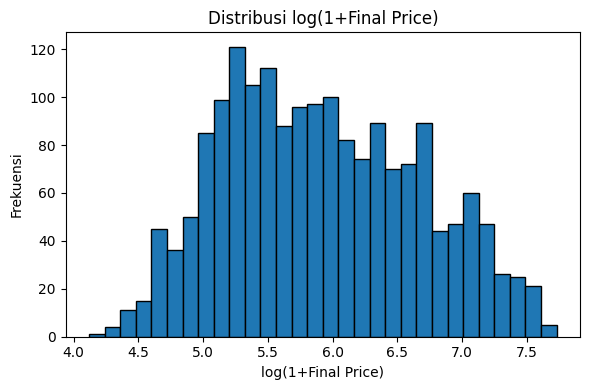

In [64]:
plt.figure(figsize=(6,4))
np.log1p(df_clean["final_price"]).plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribusi log(1+Final Price)")
plt.xlabel("log(1+Final Price)"); plt.ylabel("Frekuensi")
plt.tight_layout(); plt.show()

Insight: Jika histogram lebih simetris, berarti skala log cocok untuk analisis/regresi.

## 3.9 Jumlah Outliers

In [65]:
Q1, Q3 = df_clean["final_price"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
num_outliers = ((df_clean["final_price"] < lower) | (df_clean["final_price"] > upper)).sum()
print(f"Outlier Final Price (IQR rule): {num_outliers} baris")

Outlier Final Price (IQR rule): 94 baris


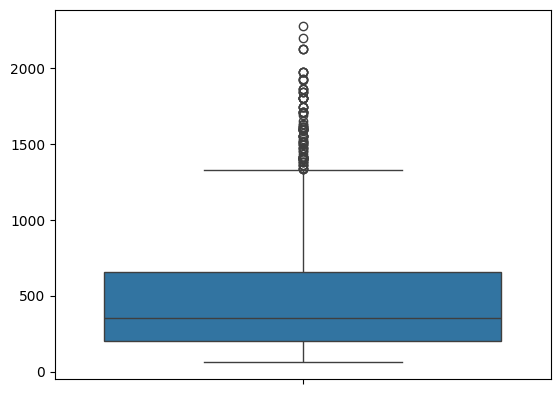

In [66]:
sns.boxplot(df_clean['final_price'].values);

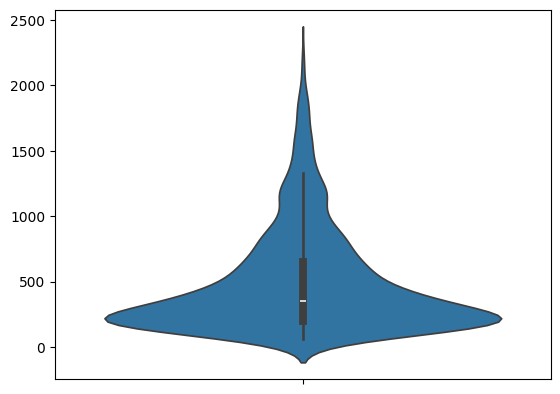

In [67]:
sns.violinplot(df_clean['final_price'].values);

Insight: Jika outlier banyak, pertimbangkan strategi (winsorize/transform/log).

## 3.10 Pasangan RAM-Storage

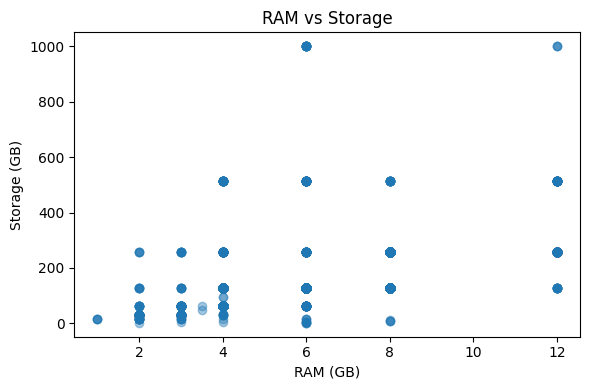

In [68]:
plt.figure(figsize=(6,4))
plt.scatter(df_clean["ram"], df_clean["storage"], alpha=0.4)
plt.title("RAM vs Storage")
plt.xlabel("RAM (GB)"); plt.ylabel("Storage (GB)")
plt.tight_layout(); plt.show()

Insight: Terlihat pasangan RAM–Storage yang umum (mis. 4/64, 6/128, 8/256).

# (4) Relationship

In [69]:
num_cols_for_corr = ["variant_rank", "ram", "storage", "final_price"]
corr = df_clean[num_cols_for_corr].corr(numeric_only=True)
print("Correlation matrix:\n")
display(corr)

Correlation matrix:



,variant_rank,ram,storage,final_price
variant_rank,1.000000,0.324379,0.392692,0.420174
ram,0.324379,1.000000,0.468827,0.503944
storage,0.392692,0.468827,1.000000,0.697247
final_price,0.420174,0.503944,0.697247,1.000000


In [70]:
# 1. Ambil kolom numerik dari dataframe hasil cleaning
data_num = df_clean.select_dtypes(include=["number"])

# 2. Fungsi untuk menghitung korelasi Pearson + p-value
def corr_pvalues(df_num):
    cols = df_num.columns
    r_mat = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols, dtype=float)
    p_mat = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols, dtype=float)

    for i in range(len(cols)):
        for j in range(len(cols)):
            if i == j:
                r_mat.iloc[i, j] = 1.0
                p_mat.iloc[i, j] = 0.0
            elif i < j:
                # drop NaN pairwise
                x = df_num.iloc[:, i]
                y = df_num.iloc[:, j]
                mask = x.notna() & y.notna()
                if mask.sum() >= 3:
                    r, p = pearsonr(x[mask], y[mask])
                else:
                    r, p = np.nan, np.nan
                r_mat.iloc[i, j] = r_mat.iloc[j, i] = r
                p_mat.iloc[i, j] = p_mat.iloc[j, i] = p
    return r_mat, p_mat

pearson_r, pearson_p = corr_pvalues(data_num)

print("=== Pearson correlation (r) ===")
display(pearson_r.round(3))
print("\n=== Pearson p-values ===")
display(pearson_p.applymap(lambda v: np.round(v, 4)))

=== Pearson correlation (r) ===


,variant_rank,ram,storage,final_price
variant_rank,1.000,0.324,0.393,0.420
ram,0.324,1.000,0.469,0.504
storage,0.393,0.469,1.000,0.697
final_price,0.420,0.504,0.697,1.000



=== Pearson p-values ===


C:\Users\chand\AppData\Local\Temp\ipykernel_463600\3840905364.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(pearson_p.applymap(lambda v: np.round(v, 4)))


,variant_rank,ram,storage,final_price
variant_rank,0.0,0.0,0.0,0.0
ram,0.0,0.0,0.0,0.0
storage,0.0,0.0,0.0,0.0
final_price,0.0,0.0,0.0,0.0


In [71]:
spearman_rho = data_num.corr(method="spearman")
print("\n=== Spearman correlation (rho) ===")
display(spearman_rho.round(3))


=== Spearman correlation (rho) ===


,variant_rank,ram,storage,final_price
variant_rank,1.000,0.290,0.319,0.393
ram,0.290,1.000,0.692,0.646
storage,0.319,0.692,1.000,0.712
final_price,0.393,0.646,0.712,1.000


In [72]:
def fisher_ci(r, n, alpha=0.05):
    """
    95% CI untuk koefisien korelasi Pearson menggunakan transformasi Fisher z.
    Mengembalikan (lo, hi); jika r NaN atau n < 4, kembalikan (NaN, NaN).
    """
    if np.isnan(r) or n < 4 or abs(r) >= 1:
        return (np.nan, np.nan)
    z = np.arctanh(r)           # Fisher z
    se = 1.0 / np.sqrt(n - 3)   # standard error
    z_crit = 1.96               # ~ 95%
    lo_z = z - z_crit * se
    hi_z = z + z_crit * se
    return (np.tanh(lo_z), np.tanh(hi_z))

rows = []
cols = data_num.columns.tolist()
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        c1, c2 = cols[i], cols[j]
        # sample size pairwise
        mask = data_num[c1].notna() & data_num[c2].notna()
        n = int(mask.sum())
        r = pearson_r.loc[c1, c2]
        p = pearson_p.loc[c1, c2]
        lo, hi = fisher_ci(r, n)
        rows.append({
            "pair": f"{c1} ~ {c2}",
            "n_pair": n,
            "pearson_r": r,
            "p_value": p,
            "ci95_lo": lo,
            "ci95_hi": hi
        })

corr_summary = pd.DataFrame(rows).sort_values(by="pearson_r", key=lambda s: s.abs(), ascending=False)
print("\n=== Ringkasan korelasi per pasangan (Pearson r, p-value, 95% CI) ===")
display(corr_summary.reset_index(drop=True).round(4))



=== Ringkasan korelasi per pasangan (Pearson r, p-value, 95% CI) ===


,pair,n_pair,pearson_r,p_value,ci95_lo,ci95_hi
0,storage ~ final_price,1816,0.6972,0.0,0.6728,0.7201
1,ram ~ final_price,1816,0.5039,0.0,0.4688,0.5375
2,ram ~ storage,1816,0.4688,0.0,0.4321,0.5040
3,variant_rank ~ final_price,1816,0.4202,0.0,0.3815,0.4573
4,variant_rank ~ storage,1816,0.3927,0.0,0.3531,0.4309
5,variant_rank ~ ram,1816,0.3244,0.0,0.2826,0.3649


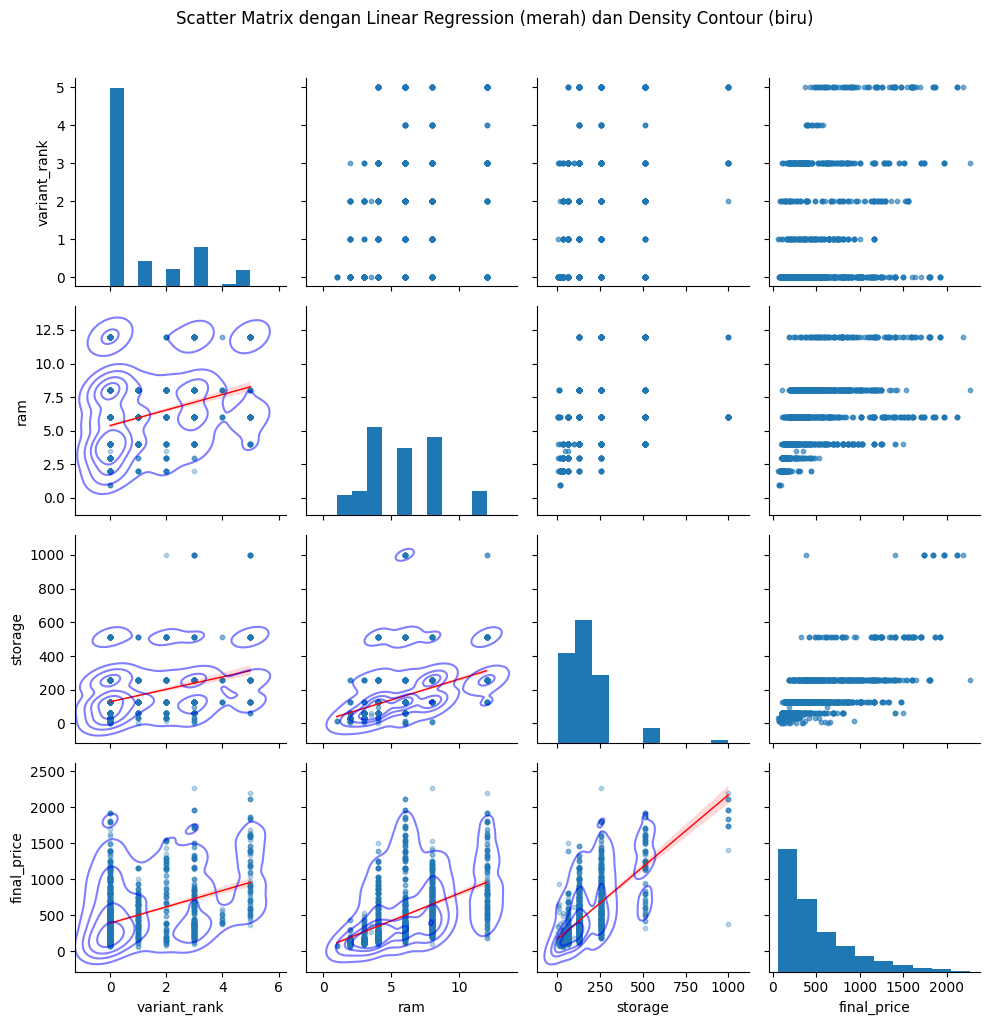

In [73]:
def plot_pairplot_with_trends(df, numerical_cols):
    g = sns.PairGrid(df[numerical_cols])
    g.map_upper(plt.scatter, alpha=0.6, s=10)
    g.map_lower(sns.regplot, scatter_kws={'alpha':0.3, 's':10}, 
                line_kws={'color':'red', 'linewidth':1})
    g.map_diag(plt.hist)
    
    # Tambahkan smoothing di diagonal bawah
    for i, col_i in enumerate(numerical_cols):
        for j, col_j in enumerate(numerical_cols):
            if i > j:  # Lower triangle
                ax = g.axes[i, j]
                sns.kdeplot(data=df, x=col_j, y=col_i, ax=ax, levels=5, color='blue', alpha=0.5)
    
    plt.suptitle('Scatter Matrix dengan Linear Regression (merah) dan Density Contour (biru)', 
                 y=1.02)
    plt.tight_layout()
    plt.show()

# Plot untuk 4 variabel numerik utama
num_cols = ["variant_rank", "ram", "storage", "final_price"]
plot_pairplot_with_trends(df_clean, num_cols)

Hubungan dengan Target (final_price):
- RAM vs Price: Hubungan positif jelas terlihat - semakin tinggi RAM, harga semakin tinggi. Pola cukup linear.
- Storage vs Price: Hubungan positif sangat kuat - garis merah jelas miring ke atas. Ini konsisten dengan korelasi 0.697.
- Variant Rank vs Price: Hubungan positif tapi lebih lemah - titik-titik lebih tersebar.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Hitung VIF untuk variabel numerik
def calculate_vif(df, numerical_features):
    # Siapkan data tanpa missing values
    X = df[numerical_features].dropna()
    X = add_constant(X)  # tambah intercept
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(len(X.columns))]
    
    return vif_data

# Variabel untuk VIF (exclude target)
features_for_vif = ["variant_rank", "ram", "storage"]  # tanpa final_price

vif_results = calculate_vif(df_clean, features_for_vif)
print("=== Variance Inflation Factor (VIF) ===")
display(vif_results)

=== Variance Inflation Factor (VIF) ===


,Feature,VIF
0,const,6.097169
1,variant_rank,1.218661
2,ram,1.321115
3,storage,1.397628


- Semua VIF < 5 → Tidak ada masalah multikolinearitas serius
- VIF mendekati 1 → Setiap variabel memberikan informasi unik yang tidak overlap dengan variabel lain
- Kesimpulan: Bisa menggunakan semua fitur tanpa takut multikolinearitas mengganggu model

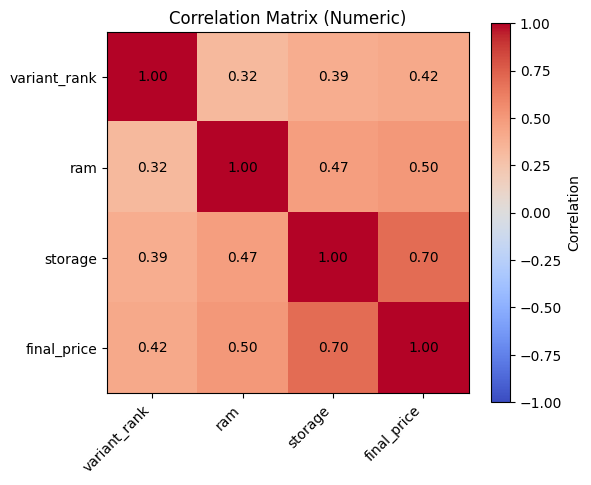

In [75]:
num_cols_for_corr = ["variant_rank", "ram", "storage", "final_price"]
corr = df_clean[num_cols_for_corr].corr(numeric_only=True)

plt.figure(figsize=(6,5))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# Label sumbu
plt.xticks(range(len(num_cols_for_corr)), num_cols_for_corr, rotation=45, ha="right")
plt.yticks(range(len(num_cols_for_corr)), num_cols_for_corr)

# Tampilkan nilai korelasi di tengah sel
for i in range(len(num_cols_for_corr)):
    for j in range(len(num_cols_for_corr)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center", color="black")

# Tambahkan colorbar
plt.colorbar(im, label="Correlation")
plt.title("Correlation Matrix (Numeric)")
plt.tight_layout()
plt.show()


Catatan: Korelasi positif Final Price dengan RAM/Storage/Variant_Rank menguatkan insight scatter plot—spesifikasi berpengaruh pada harga.

# (5) Pre-Processing

In [76]:
import numpy as np, pandas as pd, re
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [77]:
df_clean['free'] = np.where(df_clean['free'] == 'yes', 1, 0)

## 5.1 Split Data Training & Testing

In [78]:
X = df_clean[['brand','model','variant_rank','ram','storage','color',
              'has_5g','has_bundle_accessories','free']].copy()
y = np.log1p(df_clean['final_price'])

# booleans -> 0/1
for c in ['has_5g','has_bundle_accessories','free']:
    X[c] = X[c].astype(int)

num_features = ['variant_rank', 'ram', 'storage']
cat_low_features = ['color', 'has_5g', 'has_bundle_accessories', 'free']
cat_high_features = ['brand', 'model']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 1452 samples
Test set: 364 samples


## 5.2 K-Fold Target Encoding for `Model` & `Brand`

In [80]:
df_clean['brand'].nunique()

37

In [81]:
df_clean['model'].nunique()

383

Di sini, karena brand & model terdiri dari sangat beragam, kita akan menghindari penggunaan OHE. Oleh karena itu, pendekatan yang lebih tepat adalah menggunakan target encoding. Agar aman dari leakage, maka digunakan K-Fold.

In [82]:
from encoders import KFoldTargetEncoder

## 5.3 Feature Scaling

In [83]:
scaler = RobustScaler()

preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', scaler, num_features),
        ('cat_low', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_low_features),
        ('cat_high_te', KFoldTargetEncoder(cols=cat_high_features, n_splits=5, smoothing=20), cat_high_features), # brand/model → target encoding
    ],
    remainder='drop'
)


In [84]:
preprocessor_non_scaled = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat_low', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_low_features),
        ('cat_high_te', KFoldTargetEncoder(cols=cat_high_features, n_splits=5, smoothing=20), cat_high_features),
    ],
    remainder='drop'
)

In [85]:
print("X_train columns:", sorted(X_train.columns.tolist()))

def missing(expected):
    return [c for c in expected if c not in X_train.columns]

print("Missing in num_features:", missing(num_features))
print("Missing in cat_low_features:", missing(cat_low_features))
print("Missing in cat_high_features:", missing(cat_high_features))

X_train columns: ['brand', 'color', 'free', 'has_5g', 'has_bundle_accessories', 'model', 'ram', 'storage', 'variant_rank']
Missing in num_features: []
Missing in cat_low_features: []
Missing in cat_high_features: []


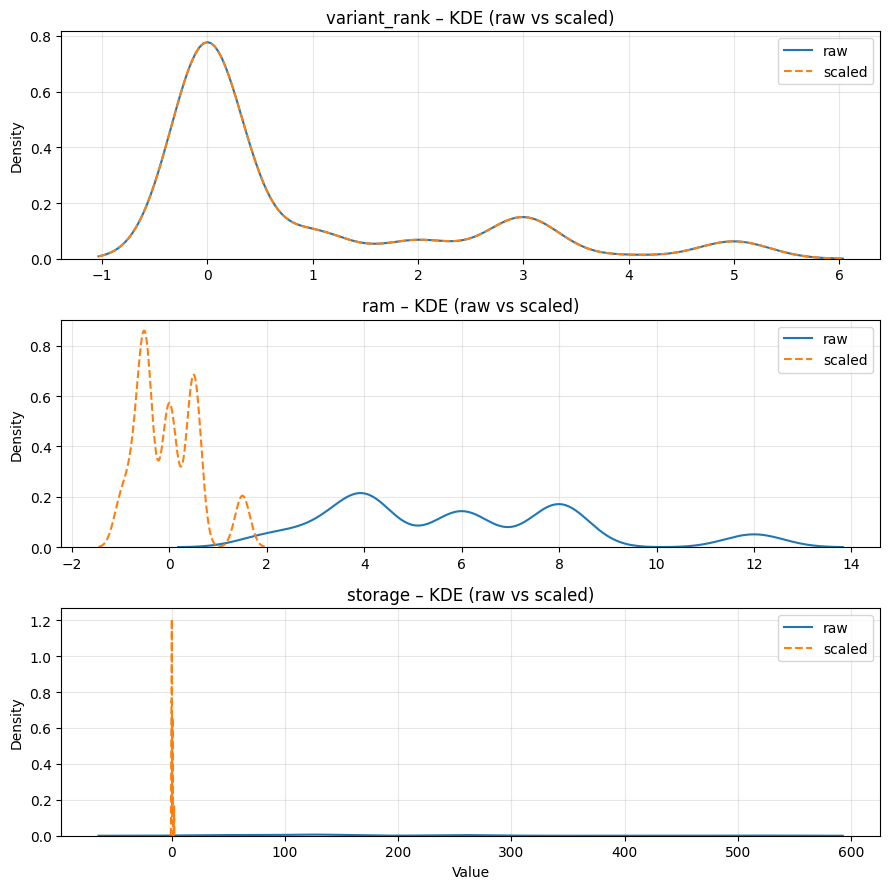

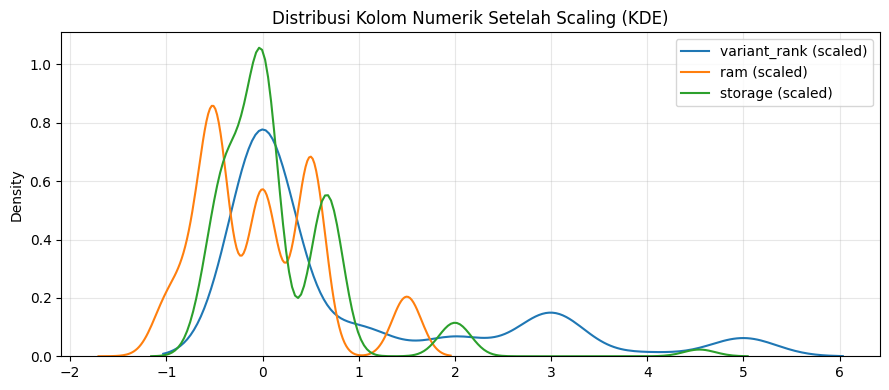

In [86]:
# fit & transform
preprocessor_scaled.fit(X_train, y_train)
Xtr = preprocessor_scaled.transform(X_train)          # dense ndarray (krn sparse_output=False)

# ambil blok numerik yang sudah discale (N kolom pertama)
n_num = len(num_features)
Xtr_num = Xtr[:, :n_num]

fig, axes = plt.subplots(n_num, 1, figsize=(9, 3*n_num))
if n_num == 1: axes = [axes]

for i, col in enumerate(num_features):
    raw = X_train[col].values
    scaled = Xtr_num[:, i]

    # opsional: clip outlier agar kurva tidak “mepet”
    r1, r99 = np.percentile(raw, [1, 99]);      raw = np.clip(raw, r1, r99)
    s1, s99 = np.percentile(scaled, [1, 99]);   scaled = np.clip(scaled, s1, s99)

    sns.kdeplot(raw,   ax=axes[i], label='raw')
    sns.kdeplot(scaled, ax=axes[i], label='scaled', linestyle='--')
    axes[i].set_title(f'{col} – KDE (raw vs scaled)')
    axes[i].set_ylabel('Density'); axes[i].grid(True, alpha=.3); axes[i].legend()

plt.xlabel('Value'); plt.tight_layout(); plt.show()

plt.figure(figsize=(9,4))
for i, col in enumerate(num_features):
    sns.kdeplot(Xtr_num[:, i], label=f'{col} (scaled)')
plt.title('Distribusi Kolom Numerik Setelah Scaling (KDE)')
plt.ylabel('Density'); plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout(); plt.show()


# (6) Modeling

In [87]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


pipelines = {
    'linear': Pipeline([
        ('prep', preprocessor_scaled),
        ('model', LinearRegression())
    ]),
    'ridge': Pipeline([
        ('prep', preprocessor_scaled),
        ('model', Ridge(alpha=1.0, random_state=42))
    ]),
    'lasso': Pipeline([
        ('prep', preprocessor_scaled),
        ('model', Lasso(alpha=0.01, random_state=42, max_iter=5000))
    ]),
    'elastic': Pipeline([
        ('prep', preprocessor_scaled),
        ('model', ElasticNet(alpha=0.01, l1_ratio=0.2, random_state=42, max_iter=5000))
    ]),
    'svr': Pipeline([
        ('prep', preprocessor_scaled),
        ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))
    ]),
    'rf': Pipeline([
        ('prep', preprocessor_non_scaled),
        ('model', RandomForestRegressor(n_estimators=300, random_state=42))
    ]),
    'xgb': Pipeline([
        ('prep', preprocessor_non_scaled),
        ('model', XGBRegressor(n_estimators=600, learning_rate=0.05,
                               max_depth=6, subsample=0.8, colsample_bytree=0.8,
                               random_state=42, n_jobs=-1))
    ]),
    'lgbm': Pipeline([
        ('prep', preprocessor_non_scaled),
        ('model', LGBMRegressor(n_estimators=800, learning_rate=0.05,
                                num_leaves=31, subsample=0.8, colsample_bytree=0.8,
                                random_state=42))
    ]),
}


In [88]:
# Catboost
cat_features = cat_low_features + cat_high_features

# catboost_model = CatBoostRegressor(
#     depth=8, learning_rate=0.05, n_estimators=1200,
#     loss_function='RMSE', random_state=42, verbose=False, thread_count=-1
# )

In [89]:
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import math

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

scorers = {
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'rmse': make_scorer(lambda yt, yp: rmse(yt, yp), greater_is_better=False),
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_pipelines_cv(pipes: dict, X, y):
    rows = []
    for name, pipe in pipes.items():
        cvres = cross_validate(pipe, X, y, cv=cv, scoring=scorers,
                               return_train_score=True, n_jobs=-1)
        rows.append({
            'model': name,
            'R2_train_mean': np.mean(cvres['train_r2']),
            'R2_test_mean':  np.mean(cvres['test_r2']),
            'R2_gap':        np.mean(cvres['train_r2']) - np.mean(cvres['test_r2']),
            'MAE_test':     -np.mean(cvres['test_mae']),
            'RMSE_test':    -np.mean(cvres['test_rmse']),
        })
    return (pd.DataFrame(rows)
            .sort_values(by='R2_test_mean', ascending=False)
            .reset_index(drop=True))

baseline_cv = evaluate_pipelines_cv(pipelines, X_train, y_train)
baseline_cv


,model,R2_train_mean,R2_test_mean,R2_gap,MAE_test,RMSE_test
0,rf,0.902562,0.816799,0.085763,0.223611,0.316214
1,xgb,0.894663,0.803793,0.090871,0.233792,0.327499
2,lgbm,0.875176,0.799423,0.075754,0.240055,0.331361
3,svr,0.822394,0.795098,0.027296,0.253286,0.334120
4,lasso,0.812669,0.783673,0.028996,0.260154,0.343501
5,elastic,0.811134,0.783191,0.027943,0.260497,0.343855
6,ridge,0.814802,0.779058,0.035745,0.261476,0.347133
7,linear,0.814567,0.776949,0.037618,0.262530,0.348756


In [90]:
# def evaluate_catboost_cv(model, X, y, cat_cols, cv):
#     X = X.copy()
#     for c in cat_cols:
#         X[c] = X[c].astype('category')

#     r2_tr, r2_te, mae_te, rmse_te = [], [], [], []
#     for tr_idx, te_idx in cv.split(X):
#         Xtr, Xte = X.iloc[tr_idx], X.iloc[te_idx]
#         ytr, yte = y.iloc[tr_idx], y.iloc[te_idx]

#         m = model.copy() if hasattr(model, 'copy') else CatBoostRegressor(**model.get_params())
#         m.set_params(verbose=False)
#         m.fit(Xtr, ytr, cat_features=cat_cols)

#         yhat_tr = m.predict(Xtr)
#         yhat_te = m.predict(Xte)

#         r2_tr.append(r2_score(ytr, yhat_tr))
#         r2_te.append(r2_score(yte, yhat_te))
#         mae_te.append(mean_absolute_error(yte, yhat_te))
#         rmse_te.append(math.sqrt(mean_squared_error(yte, yhat_te)))

#     return pd.DataFrame([{
#         'model':'catboost',
#         'R2_train_mean': np.mean(r2_tr),
#         'R2_test_mean':  np.mean(r2_te),
#         'R2_gap':        np.mean(r2_tr) - np.mean(r2_te),
#         'MAE_test':      np.mean(mae_te),
#         'RMSE_test':     np.mean(rmse_te),
#     }])

# baseline_cb = evaluate_catboost_cv(catboost_model, X_train, y_train, cat_features, cv)
# pd.concat([baseline_cv, baseline_cb], ignore_index=True).sort_values('R2_test_mean', ascending=False)

# (7) Model Evaluation

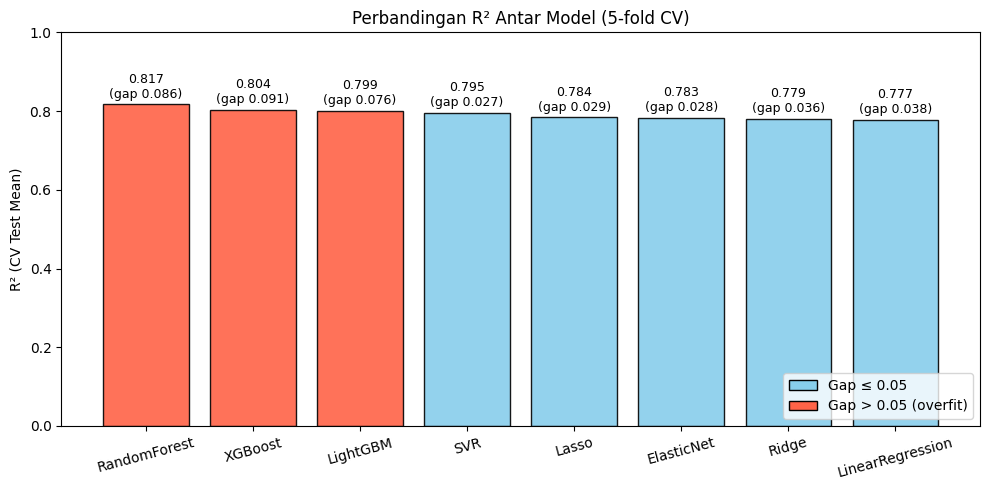

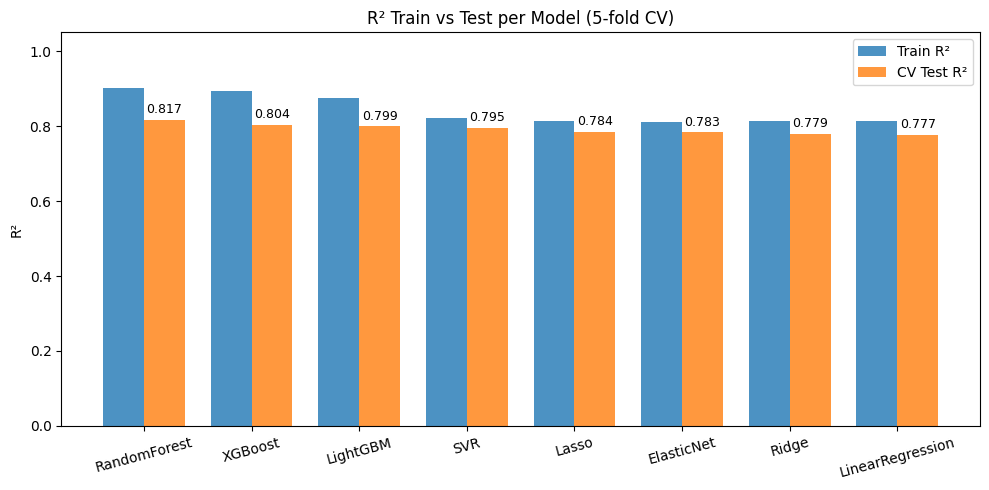

,model,R2_train_mean,R2_test_mean,R2_gap,MAE_test,RMSE_test
0,RandomForest,0.902562,0.816799,0.085763,0.223611,0.316214
1,XGBoost,0.894663,0.803793,0.090871,0.233792,0.327499
2,LightGBM,0.875176,0.799423,0.075754,0.240055,0.331361
3,SVR,0.822394,0.795098,0.027296,0.253286,0.334120
4,Lasso,0.812669,0.783673,0.028996,0.260154,0.343501
5,ElasticNet,0.811134,0.783191,0.027943,0.260497,0.343855
6,Ridge,0.814802,0.779058,0.035745,0.261476,0.347133
7,LinearRegression,0.814567,0.776949,0.037618,0.262530,0.348756


In [91]:
# 1) Gabungkan hasil CV (pipeline + CatBoost), sort desc by R² test
# df_plot = pd.concat([baseline_cv, baseline_cb], ignore_index=True)
df_plot = baseline_cv

# rapikan nama model
name_map = {
    'linear':'LinearRegression', 'svr':'SVR', 'rf':'RandomForest',
    'xgb':'XGBoost', 'lgbm':'LightGBM', 'ridge':'Ridge',
    'lasso':'Lasso', 'elastic':'ElasticNet', 'catboost':'CatBoost'
}
df_plot['model'] = df_plot['model'].map(name_map).fillna(df_plot['model'])
df_plot = df_plot.sort_values('R2_test_mean', ascending=False).reset_index(drop=True)

# 2) Visualisasi 1 -> Bar chart R² test mean (ada anotasi + flag overfit)
fig, ax = plt.subplots(figsize=(10, 5))

# warna: merah untuk gap > 0.05, biru lainnya
colors = ['tomato' if g > 0.05 else 'skyblue' for g in df_plot['R2_gap']]

bars = ax.bar(df_plot['model'], df_plot['R2_test_mean'], color=colors, edgecolor='black', alpha=0.9)
ax.set_ylim(0, 1.0)
ax.set_ylabel('R² (CV Test Mean)')
ax.set_title('Perbandingan R² Antar Model (5-fold CV)')

# anotasi di atas bar: nilai R² dan gap
for b, r2, gap in zip(bars, df_plot['R2_test_mean'], df_plot['R2_gap']):
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 0.01,
            f'{r2:.3f}\n(gap {gap:.3f})',
            ha='center', va='bottom', fontsize=9)

# legenda sederhana untuk overfit flag
from matplotlib.patches import Patch
legend_elems = [Patch(facecolor='skyblue', edgecolor='black', label='Gap ≤ 0.05'),
                Patch(facecolor='tomato',  edgecolor='black', label='Gap > 0.05 (overfit)')]
ax.legend(handles=legend_elems, loc='lower right')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 3) Visualisasi 2 -> Grouped bar: R² Train vs Test per model
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(df_plot))
w = 0.38

ax.bar(x - w/2, df_plot['R2_train_mean'], width=w, label='Train R²', alpha=0.8)
ax.bar(x + w/2, df_plot['R2_test_mean'],  width=w, label='CV Test R²', alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(df_plot['model'], rotation=15)
ax.set_ylim(0, 1.05)
ax.set_ylabel('R²')
ax.set_title('R² Train vs Test per Model (5-fold CV)')
ax.legend()

# anotasi nilai di atas bar test
for xi, r2 in zip(x, df_plot['R2_test_mean']):
    ax.text(xi + w/2, r2 + 0.01, f'{r2:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# (opsional) tampilkan tabel ringkas yang dipakai untuk plot
df_plot[['model','R2_train_mean','R2_test_mean','R2_gap','MAE_test','RMSE_test']]


# (8) Hyperparameter Tuning


In [92]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

# Linear models
param_linear = {
    'model__fit_intercept': [True, False],
    'model__positive': [False, True],   # paksa koefisien non-negatif (opsi pembatasan)
}
param_ridge = {'model__alpha': loguniform(1e-3, 1e2)}
param_lasso = {'model__alpha': loguniform(1e-4, 1e1)}
param_elastic = {
    'model__alpha': loguniform(1e-4, 1e1),
    'model__l1_ratio': uniform(0.0, 1.0),
}

tuned_linear = RandomizedSearchCV(pipelines['linear'], param_distributions=param_linear, n_iter=4, cv=cv,
                                  scoring='r2', n_jobs=-1, random_state=42)
tuned_ridge = RandomizedSearchCV(pipelines['ridge'], param_ridge, n_iter=20, cv=cv,
                                 scoring='r2', n_jobs=-1, random_state=42)
tuned_lasso = RandomizedSearchCV(pipelines['lasso'], param_lasso, n_iter=20, cv=cv,
                                 scoring='r2', n_jobs=-1, random_state=42)
tuned_elastic = RandomizedSearchCV(pipelines['elastic'], param_elastic, n_iter=30, cv=cv,
                                   scoring='r2', n_jobs=-1, random_state=42)

# SVR
param_svr = {
    'model__C': loguniform(1e-2, 1e2),
    'model__epsilon': loguniform(1e-3, 1e0),
    'model__gamma': ['scale', 'auto']  # bisa tambah loguniform(1e-3,1e-1) kalau mau
}
tuned_svr = RandomizedSearchCV(pipelines['svr'], param_svr, n_iter=30, cv=cv,
                               scoring='r2', n_jobs=-1, random_state=42)

# RandomForest
param_rf = {
    'model__n_estimators': [300, 600, 900],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_leaf': [1, 3, 5],
    'model__max_features': ['sqrt', 0.7, 1.0],
}
tuned_rf = RandomizedSearchCV(pipelines['rf'], param_rf, n_iter=25, cv=cv,
                              scoring='r2', n_jobs=-1, random_state=42)

# XGBoost
param_xgb = {
    'model__n_estimators': [500, 800, 1200],
    'model__max_depth': [4, 6, 8],
    'model__learning_rate': [0.03, 0.05, 0.1],
    'model__subsample': [0.7, 0.9, 1.0],
    'model__colsample_bytree': [0.7, 0.9, 1.0],
    'model__reg_lambda': [0, 1, 5, 10]
}
tuned_xgb = RandomizedSearchCV(pipelines['xgb'], param_xgb, n_iter=30, cv=cv,
                               scoring='r2', n_jobs=-1, random_state=42)

# LightGBM
param_lgbm = {
    'model__n_estimators': [600, 900, 1200],
    'model__learning_rate': [0.03, 0.05, 0.1],
    'model__num_leaves': [31, 63, 127],
    'model__max_depth': [-1, 6, 10],
    'model__min_data_in_leaf': [10, 20, 50],
    'model__feature_fraction': [0.7, 0.9, 1.0],
    'model__bagging_fraction': [0.7, 0.9, 1.0],
    'model__lambda_l2': [0.0, 1.0, 5.0, 10.0],
}
tuned_lgbm = RandomizedSearchCV(pipelines['lgbm'], param_lgbm, n_iter=30, cv=cv,
                                scoring='r2', n_jobs=-1, random_state=42)

tuned_linear.fit(X_train, y_train)
tuned_ridge.fit(X_train, y_train)
tuned_lasso.fit(X_train, y_train)
tuned_elastic.fit(X_train, y_train)
tuned_svr.fit(X_train, y_train)
tuned_rf.fit(X_train, y_train)
tuned_xgb.fit(X_train, y_train)
tuned_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=10.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=10.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

,estimator,Pipeline(step...sample=0.8))])
,param_distributions,"{'model__bagging_fraction': [0.7, 0.9, ...], 'model__feature_fraction': [0.7, 0.9, ...], 'model__lambda_l2': [0.0, 1.0, ...], 'model__learning_rate': [0.03, 0.05, ...], ...}"
,n_iter,30
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [93]:
# # CatBoost
# from catboost import Pool

# def tune_catboost(X, y, cat_cols):
#     # split kecil untuk early-stopping
#     Xtr, Xva, ytr, yva = train_test_split(X, y, test_size=0.2, random_state=42)
#     for c in cat_cols:
#         Xtr[c] = Xtr[c].astype('category'); Xva[c] = Xva[c].astype('category')

#     candidates = [
#         {'depth':6, 'l2_leaf_reg':3, 'learning_rate':0.05, 'subsample':0.8, 'iterations':2000},
#         {'depth':8, 'l2_leaf_reg':5, 'learning_rate':0.05, 'subsample':0.8, 'iterations':2000},
#         {'depth':10,'l2_leaf_reg':5, 'learning_rate':0.03, 'subsample':0.9, 'iterations':2500},
#     ]
#     best = None; best_r2 = -1e9
#     for p in candidates:
#         m = CatBoostRegressor(loss_function='RMSE', random_state=42, verbose=False, **p)
#         m.fit(Xtr, ytr, cat_features=cat_cols,
#               eval_set=(Xva, yva), early_stopping_rounds=100, verbose=False)
#         r2 = r2_score(yva, m.predict(Xva))
#         if r2 > best_r2: best_r2, best = r2, m
#     return best

# best_cb = tune_catboost(X_train.copy(), y_train.copy(), cat_features)

In [94]:
# === Evaluator semua model ===
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def final_eval(estimator, Xtr, ytr, Xte, yte, name='model', cat_cols=None):
    est = estimator
    # if isinstance(est, CatBoostRegressor):
    #     # CatBoost butuh dtype category + arg cat_features
    #     Xtr_ = Xtr.copy(); Xte_ = Xte.copy()
    #     if cat_cols is None:
    #         raise ValueError("cat_cols (daftar fitur kategorik) wajib untuk CatBoost.")
    #     for c in cat_cols:
    #         Xtr_[c] = Xtr_[c].astype('category')
    #         Xte_[c] = Xte_[c].astype('category')
    #     est.fit(Xtr_, ytr, cat_features=cat_cols, verbose=False)
    #     yhat_tr = est.predict(Xtr_); yhat_te = est.predict(Xte_)
    # else:
    #     est.fit(Xtr, ytr)
    #     yhat_tr = est.predict(Xtr); yhat_te = est.predict(Xte)
    est.fit(Xtr, ytr)
    yhat_tr = est.predict(Xtr); yhat_te = est.predict(Xte)

    r2_tr = r2_score(ytr, yhat_tr); r2_te = r2_score(yte, yhat_te)
    mae   = mean_absolute_error(yte, yhat_te)
    rmse  = math.sqrt(mean_squared_error(yte, yhat_te))
    return {'Model': name, 'R2_Train': r2_tr, 'R2_Test': r2_te, 'MAE': mae, 'RMSE': rmse}

def eval_table(models_dict, Xtr, ytr, Xte, yte, cat_cols=None):
    rows = [final_eval(m, Xtr, ytr, Xte, yte, name=k, cat_cols=cat_cols)
            for k, m in models_dict.items()]
    return (pd.DataFrame(rows)
            .sort_values('R2_Test', ascending=False)
            .reset_index(drop=True))


In [95]:
# === BASELINE (Before) ===
baseline_models = {
    'LinearRegression': pipelines['linear'],
    'Ridge':            pipelines['ridge'],
    'Lasso':            pipelines['lasso'],
    'ElasticNet':       pipelines['elastic'],
    'SVR':              pipelines['svr'],
    'RandomForest':     pipelines['rf'],
    'XGBoost':          pipelines['xgb'],
    'LightGBM':         pipelines['lgbm'],
    # 'CatBoost':         catboost_model,      # <- baseline CatBoost
}
df_before = eval_table(baseline_models, X_train, y_train, X_test, y_test, cat_cols=cat_features)

# === TUNED (After) ===
tuned_models = {
    'LinearRegression': tuned_linear.best_estimator_,
    'Ridge':            tuned_ridge.best_estimator_,
    'Lasso':            tuned_lasso.best_estimator_,
    'ElasticNet':       tuned_elastic.best_estimator_,
    'SVR':              tuned_svr.best_estimator_,
    'RandomForest':     tuned_rf.best_estimator_,
    'XGBoost':          tuned_xgb.best_estimator_,
    'LightGBM':         tuned_lgbm.best_estimator_,
    # 'CatBoost':         best_cb,            
}
df_after = eval_table(tuned_models, X_train, y_train, X_test, y_test, cat_cols=cat_features)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 1452, number of used features: 18
[LightGBM] [Info] Start training from score 5.906475


c:\Users\chand\anaconda3\envs\smartphone-price-prediction\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\chand\anaconda3\envs\smartphone-price-prediction\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=10.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=10.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the 

c:\Users\chand\anaconda3\envs\smartphone-price-prediction\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\chand\anaconda3\envs\smartphone-price-prediction\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


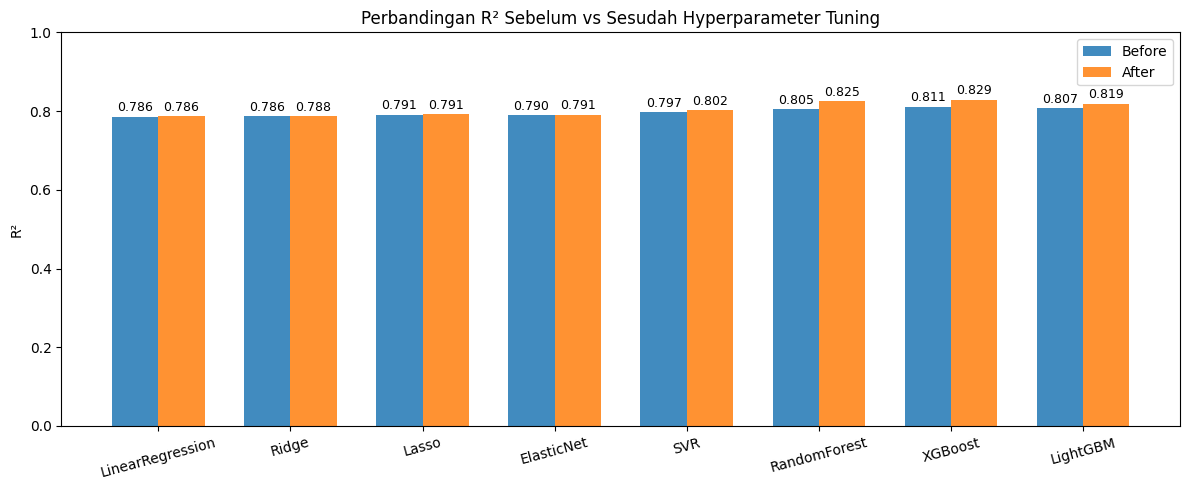

In [96]:
#  Visualisasi hasil

order = list(baseline_models.keys())  # urutan konsisten
r2_before = [df_before.set_index('Model').loc[m, 'R2_Test'] for m in order]
r2_after  = [df_after .set_index('Model').loc[m, 'R2_Test'] for m in order]

x = np.arange(len(order)); w = 0.35
fig, ax = plt.subplots(figsize=(12,5))
b1 = ax.bar(x - w/2, r2_before, width=w, label='Before', alpha=.85)
b2 = ax.bar(x + w/2, r2_after,  width=w, label='After',  alpha=.85)
ax.set_title('Perbandingan R² Sebelum vs Sesudah Hyperparameter Tuning')
ax.set_ylabel('R²'); ax.set_xticks(x); ax.set_xticklabels(order, rotation=15)
ax.set_ylim(0,1.0); ax.legend()
for bars in (b1,b2):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+0.006, f'{h:.3f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout(); plt.show()


## 80/20 vs 70/30 Train-Test Size

In [97]:
# ===== 70/30 holdout evaluation tanpa perlu re-tuning =====
from sklearn.base import clone

def evaluate_holdout(test_size=0.3, use_tuned=True):
    """
    Re-split to a new holdout and evaluate models.
    - If use_tuned=True: refit the tuned best_estimator_ on the new train split.
    - If use_tuned=False: use your baseline pipelines (no tuning).
    Returns a dataframe like your existing eval_table.
    """
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=test_size, random_state=42)

    if use_tuned:
        models = {
            'LinearRegression': clone(tuned_linear.best_estimator_),
            'Ridge':            clone(tuned_ridge.best_estimator_),
            'Lasso':            clone(tuned_lasso.best_estimator_),
            'ElasticNet':       clone(tuned_elastic.best_estimator_),
            'SVR':              clone(tuned_svr.best_estimator_),
            'RandomForest':     clone(tuned_rf.best_estimator_),
            'XGBoost':          clone(tuned_xgb.best_estimator_),
            'LightGBM':         clone(tuned_lgbm.best_estimator_),
        }
        # If you used CatBoost and want it included:
        # try:
        #     models['CatBoost'] = best_cb  # best_cb can be refit as-is
        # except NameError:
        #     pass
    else:
        # Use your baseline pipelines dict if you want to compare untuned models
        models = pipelines

    # Evaluate with your existing helper
    df = eval_table(models, Xtr, ytr, Xte, yte)
    df['R2_Gap'] = df['R2_Train'] - df['R2_Test']
    df['Overfitting?'] = np.where(df['R2_Gap'] > 0.05, 'YES', 'NO')
    return df

# Keep your original 80/20 tuned results if you want to compare side-by-side
df_8020 = df_after.copy()  # assuming df_after was your tuned 80/20 table

# Now run a 70/30 holdout with the same tuned hyperparameters
df_7030 = evaluate_holdout(test_size=0.30, use_tuned=True)
display(df_7030)


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=10.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=10.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10.0
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.8 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the 

c:\Users\chand\anaconda3\envs\smartphone-price-prediction\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\chand\anaconda3\envs\smartphone-price-prediction\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Model,R2_Train,R2_Test,MAE,RMSE,R2_Gap,Overfitting?
0,RandomForest,0.896777,0.821122,0.222002,0.316480,0.075654,YES
1,XGBoost,0.889685,0.812378,0.232685,0.324123,0.077306,YES
2,LightGBM,0.881729,0.810362,0.235994,0.325860,0.071368,YES
3,SVR,0.836131,0.800995,0.248762,0.333810,0.035136,NO
4,Lasso,0.811357,0.789613,0.257736,0.343224,0.021743,NO
5,ElasticNet,0.811276,0.789565,0.257803,0.343263,0.021711,NO
6,Ridge,0.812559,0.784173,0.261244,0.347633,0.028386,NO
7,LinearRegression,0.811822,0.783330,0.261047,0.348311,0.028492,NO


In [98]:
compare = (df_8020[['Model','R2_Test']].rename(columns={'R2_Test':'R2_Test_80_20'})
           .merge(df_7030[['Model','R2_Test']], on='Model', how='inner')
           .rename(columns={'R2_Test':'R2_Test_70_30'}))
compare['Delta'] = compare['R2_Test_70_30'] - compare['R2_Test_80_20']
compare.sort_values('R2_Test_70_30', ascending=False)


,Model,R2_Test_80_20,R2_Test_70_30,Delta
1,RandomForest,0.824792,0.821122,-0.003669
0,XGBoost,0.829213,0.812378,-0.016835
2,LightGBM,0.819095,0.810362,-0.008733
3,SVR,0.801624,0.800995,-0.000629
4,Lasso,0.791263,0.789613,-0.001649
5,ElasticNet,0.791251,0.789565,-0.001686
6,Ridge,0.787527,0.784173,-0.003355
7,LinearRegression,0.786226,0.783330,-0.002896


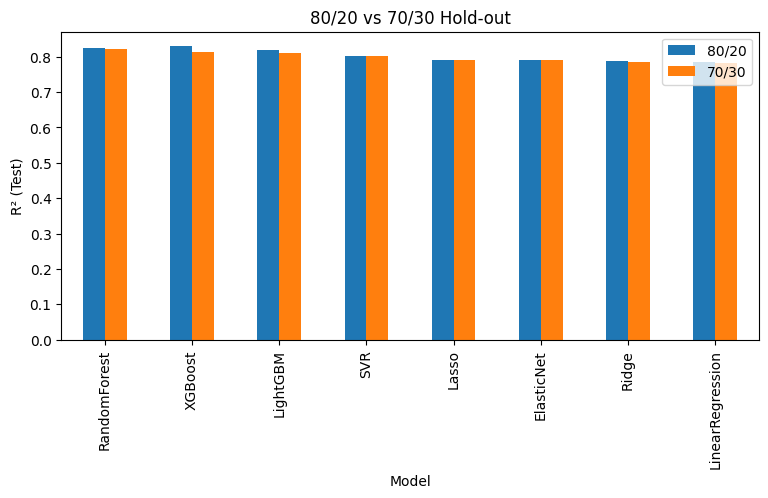

In [99]:
ax = compare.sort_values('R2_Test_70_30', ascending=False).plot(
    x='Model', y=['R2_Test_80_20','R2_Test_70_30'], kind='bar', figsize=(9,4)
)
ax.set_ylabel('R² (Test)'); ax.set_title('80/20 vs 70/30 Hold-out'); 
ax.legend(['80/20','70/30'])

Insight: 
- Hampir semua model turun sedikit saat pindah ke 70/30 (≈ −0.002 s.d. −0.013).
- Model boosting/tree (LightGBM, XGBoost) mengalami penurunan paling besar (≈ −0.013).
- SVR justru paling stabil, bahkan sedikit naik (~+0.0004), sehingga performanya tidak terlalu berubah.
- Linear/regularized (Ridge/Lasso/ElasticNet) turun tipis (≈ −0.002 s.d. −0.0036).

Jadi, mengubah split ke 70/30 tidak mengubah keputusan. SVR (tuned) tetap model yang paling seimbang antara akurasi dan generalisasi. Kita akan tetap menggunakan 80/20 split karena data training yang digunakan akan lebih banyak, tanpa mengorbankan terlalu banyak data uji. Dengan data training yang lebih banyak, maka model menjadi lebih "terlatih" dan hasil prediksinya biasanya lebih stabil.

# (9) Overfitting Check

In [100]:
df_before

,Model,R2_Train,R2_Test,MAE,RMSE
0,XGBoost,0.890155,0.811031,0.224457,0.339534
1,LightGBM,0.881028,0.807188,0.239054,0.342970
2,RandomForest,0.902993,0.805002,0.229351,0.344908
3,SVR,0.826613,0.797164,0.262103,0.351772
4,Lasso,0.813861,0.790748,0.263318,0.357292
5,ElasticNet,0.812849,0.789764,0.265123,0.358131
6,Ridge,0.815854,0.786379,0.267977,0.361003
7,LinearRegression,0.815757,0.785683,0.268590,0.361590


In [101]:
df_after

,Model,R2_Train,R2_Test,MAE,RMSE
0,XGBoost,0.884899,0.829213,0.220565,0.322787
1,RandomForest,0.892881,0.824792,0.221039,0.326939
2,LightGBM,0.875759,0.819095,0.231428,0.332211
3,SVR,0.836492,0.801624,0.256169,0.347883
4,Lasso,0.814773,0.791263,0.263060,0.356853
5,ElasticNet,0.814702,0.791251,0.263076,0.356862
6,Ridge,0.815620,0.787527,0.267006,0.360031
7,LinearRegression,0.814987,0.786226,0.267760,0.361132


In [102]:
# Gabungkan & rapikan kolom
tbl_before = df_before.rename(columns={
    'R2_Test':'R2_Before', 'MAE':'MAE_Before', 'RMSE':'RMSE_Before'
})[['Model','R2_Before','MAE_Before','RMSE_Before']]

tbl_after = df_after.rename(columns={
    'R2_Train':'R2_Train_After', 'R2_Test':'R2_After',
    'MAE':'MAE_After', 'RMSE':'RMSE_After'
})[['Model','R2_Train_After','R2_After','MAE_After','RMSE_After']]

df_compare = (tbl_before
    .merge(tbl_after, on='Model', how='outer')
    .assign(
        Delta_R2=lambda d: d['R2_After'] - d['R2_Before'],
        Overfitting=lambda d: np.where(
            (d['R2_Train_After'] - d['R2_After']) > 0.05, 'YES', 'NO'
        )
    )
    .sort_values('R2_After', ascending=False)
    .reset_index(drop=True)
)

# tampilkan rapi
df_compare.round(3)


,Model,R2_Before,MAE_Before,RMSE_Before,R2_Train_After,R2_After,MAE_After,RMSE_After,Delta_R2,Overfitting
0,XGBoost,0.811,0.224,0.340,0.885,0.829,0.221,0.323,0.018,YES
1,RandomForest,0.805,0.229,0.345,0.893,0.825,0.221,0.327,0.020,YES
2,LightGBM,0.807,0.239,0.343,0.876,0.819,0.231,0.332,0.012,YES
3,SVR,0.797,0.262,0.352,0.836,0.802,0.256,0.348,0.004,NO
4,Lasso,0.791,0.263,0.357,0.815,0.791,0.263,0.357,0.001,NO
5,ElasticNet,0.790,0.265,0.358,0.815,0.791,0.263,0.357,0.001,NO
6,Ridge,0.786,0.268,0.361,0.816,0.788,0.267,0.360,0.001,NO
7,LinearRegression,0.786,0.269,0.362,0.815,0.786,0.268,0.361,0.001,NO


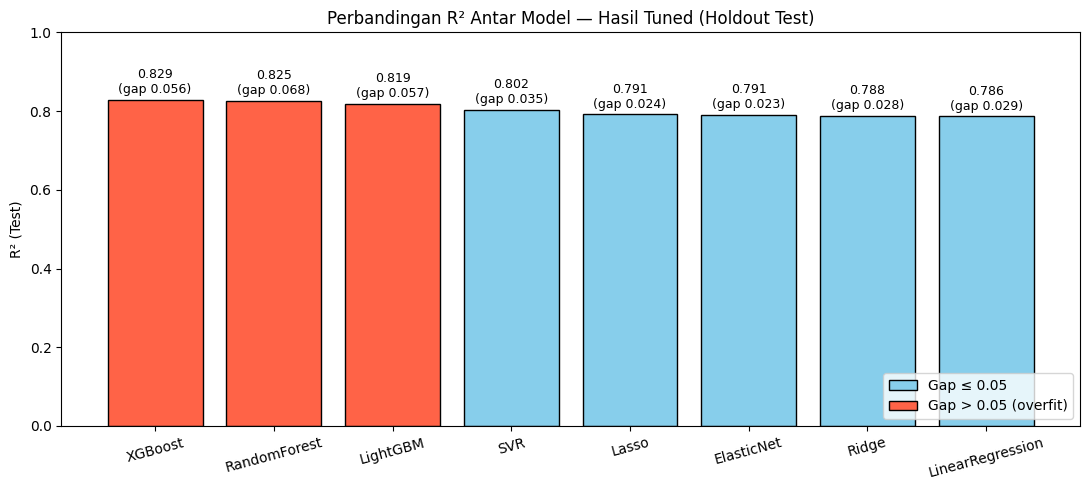

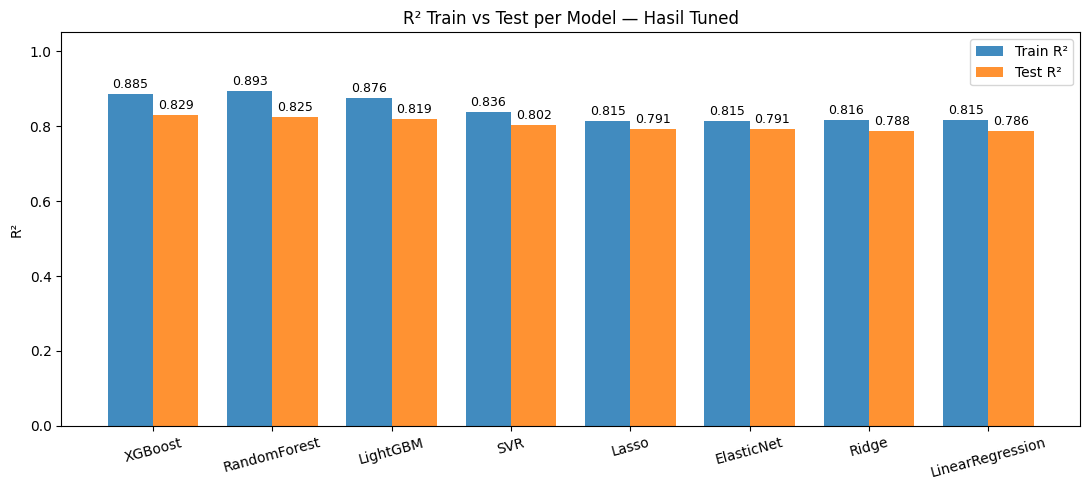

,Model,R2_Train,R2_Test,MAE_Test,RMSE_Test,R2_Train - R2_Test,Overfit?
0,XGBoost,0.885,0.829,0.221,0.323,0.056,YES
1,RandomForest,0.893,0.825,0.221,0.327,0.068,YES
2,LightGBM,0.876,0.819,0.231,0.332,0.057,YES
3,SVR,0.836,0.802,0.256,0.348,0.035,NO
4,Lasso,0.815,0.791,0.263,0.357,0.024,NO
5,ElasticNet,0.815,0.791,0.263,0.357,0.023,NO
6,Ridge,0.816,0.788,0.267,0.360,0.028,NO
7,LinearRegression,0.815,0.786,0.268,0.361,0.029,NO


In [103]:
# --- siapkan data dari hasil tuned ---
df_tuned = df_after.copy()
df_tuned['Gap'] = df_tuned['R2_Train'] - df_tuned['R2_Test']
df_tuned['Overfit?'] = np.where(df_tuned['Gap'] > 0.05, 'YES', 'NO')

# sort by R2_Test desc untuk tampilan
df_plot = df_tuned.sort_values('R2_Test', ascending=False).reset_index(drop=True)

# === Plot 1: R² Test (tuned) dengan warna berdasarkan Gap ===
fig, ax = plt.subplots(figsize=(11,5))
colors = ['tomato' if g > 0.05 else 'skyblue' for g in df_plot['Gap']]
bars = ax.bar(df_plot['Model'], df_plot['R2_Test'], color=colors, edgecolor='black')
ax.set_ylim(0, 1.0)
ax.set_ylabel('R² (Test)')
ax.set_title('Perbandingan R² Antar Model — Hasil Tuned (Holdout Test)')

for b, r2, gap in zip(bars, df_plot['R2_Test'], df_plot['Gap']):
    ax.text(b.get_x()+b.get_width()/2, r2+0.01, f'{r2:.3f}\n(gap {gap:.3f})',
            ha='center', va='bottom', fontsize=9)

from matplotlib.patches import Patch
ax.legend(handles=[Patch(facecolor='skyblue', edgecolor='black', label='Gap ≤ 0.05'),
                   Patch(facecolor='tomato',  edgecolor='black', label='Gap > 0.05 (overfit)')],
          loc='lower right')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# === Plot 2: R² Train vs R² Test (tuned) ===
fig, ax = plt.subplots(figsize=(11,5))
x = np.arange(len(df_plot)); w = 0.38

b_train = ax.bar(x - w/2, df_plot['R2_Train'], width=w, label='Train R²', alpha=0.85)
b_test  = ax.bar(x + w/2, df_plot['R2_Test'],  width=w, label='Test R²',  alpha=0.85)

ax.set_xticks(x); ax.set_xticklabels(df_plot['Model'], rotation=15)
ax.set_ylim(0, 1.05); ax.set_ylabel('R²')
ax.set_title('R² Train vs Test per Model — Hasil Tuned')
ax.legend()

# --- angka di atas tiap bar ---
for bars in (b_train, b_test):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.008, f'{h:.3f}',
                ha='center', va='bottom', fontsize=9)
plt.tight_layout(); plt.show()

# === Tabel ringkas: status overfitting ===
overfit_table = (
    df_plot[['Model', 'R2_Train', 'R2_Test', 'MAE', 'RMSE', 'Gap', 'Overfit?']]
      .rename(columns={
          'MAE': 'MAE_Test',
          'RMSE': 'RMSE_Test',
          'Gap': 'R2_Train - R2_Test'
      })
      .sort_values('R2_Test', ascending=False)
      .reset_index(drop=True)
      .round(3)
)
overfit_table.round(3)


In [104]:
best_params = tuned_svr.best_params_
print(f"SVR Best Parameters: {best_params}")

SVR Best Parameters: {'model__C': np.float64(13.826232179369875), 'model__epsilon': np.float64(0.00397211072738191), 'model__gamma': 'scale'}


Berdasarkan hasil yang dipaparkan di atas:
- Model yang mengalami overfit (ditandai dengan gap R2 > 0.05) adalah XGBoost, LightGBM, CatBoost, dan RandomForest.
- Model yang tidak mengalami overfit adalah SVR, ElasticNet, Lasso, Ridge, dan LinearRegression. 

Dengan ini, maka dapat disimpulkan bahwa pilihan terbaik jatuh kepada **SVR (tuned)**. Ada beberapa alasan yang dapat menjelaskan ini:
- SVR memiliki R2 tertinggi di antara model yang tidak overfit, yaitu ~0,803. 
- Memiliki MAE/RMSE yang lebih rendah dibandingkan model non-overfitting lainnya.
- Meskipun model Boosting seperti LightGBM/XGBoost memiliki hasil R2, MAE, dan RMSE terbaik, sayangnya model tersebut mengalami overfit. 


# (10) Model Selection

In [105]:
candidates = overfit_table[overfit_table['Overfit?'] == 'NO'].copy()

#  pilih yang R²_Test tertinggi
best_row = candidates.loc[candidates['R2_Test'].idxmax()]
best_model_name = best_row['Model']

print("=== Model Terbaik (tidak overfit) ===")
print(f"Nama Model : {best_model_name}")
print(f"R²_Train   : {best_row['R2_Train']:.3f}")
print(f"R²_Test    : {best_row['R2_Test']:.3f}")
print(f"Gap        : {best_row['R2_Train'] - best_row['R2_Test']:.3f}")
print(f"MAE_Test   : {best_row['MAE_Test']:.3f}")
print(f"RMSE_Test  : {best_row['RMSE_Test']:.3f}")

=== Model Terbaik (tidak overfit) ===
Nama Model : SVR
R²_Train   : 0.836
R²_Test    : 0.802
Gap        : 0.034
MAE_Test   : 0.256
RMSE_Test  : 0.348


# (11) Model Deployment

In [106]:
import joblib, json, os

# 1) tentukan estimator terbaik
best_model_name = best_model_name     
best_estimator  = tuned_models[best_model_name]            # Pipeline berisi preprocessor + model

# 2) siapkan metadata untuk UI
meta = {
    "model_name": best_model_name,
    "feature_order": list(X_train.columns),
    "num_features": num_features,
    "cat_low_features": cat_low_features,           # OHE
    "cat_high_features": cat_high_features,         # target-encoded
    "binary_features": ['has_5g','has_bundle_accessories','free'],
    "y_is_log1p": True,
    # Simpan opsi dropdown (boleh dipotong kalau terlalu banyak)
    "choices": {c: sorted(map(str, X_train[c].dropna().unique().tolist()))
                for c in (cat_low_features + cat_high_features)}
}

# after you define meta = {...}
numeric_choices = {}
for c in ['ram', 'storage']:
    if c in X_train.columns:
        # only keep reasonable counts; if too many, the app will fallback
        vals = sorted(pd.Series(X_train[c].unique()).dropna().astype(float).tolist())
        if len(vals) <= 50:
            numeric_choices[c] = vals

meta["numeric_choices"] = numeric_choices

# 3) simpan model + metadata
os.makedirs("artifacts", exist_ok=True)
joblib.dump(best_estimator, "artifacts/model.pkl")
with open("artifacts/meta.json","w",encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print("Saved into artifacts/model.pkl  &  artifacts/meta.json")

Saved into artifacts/model.pkl  &  artifacts/meta.json


## Streamlit Deployment
[Link Streamlit](https://group-dewaruci-smartphone-price-prediction.streamlit.app/)

# (12) Kesimpulan dan Saran

1. **Proses & Pembelajaran Utama**

* **Data acquisition & cleaning.** Tidak sekadar mengisi nilai hilang dengan median, kami telah melakukan **ekstraksi langsung dari website** dan pembersihan berbasis aturan (mis. normalisasi nama varian → `variant_rank`, pembersihan boolean `has_5g/has_bundle_accessories/free`, dst.).
* **Hindari data leakage.** **Split train–test dilakukan sebelum** feature engineering dan scaling. Seluruh preprocessing dibungkus di **`Pipeline` + `ColumnTransformer`** agar konsisten saat training, evaluasi, dan deploy.
* **Target skewed.** Distribusi `final_price` **miring (right-skewed)** sehingga kami menggunakan **`np.log1p(y)`** saat training; saat prediksi di aplikasi, hasil dikembalikan ke satuan asli dengan **`np.expm1()`**. Ini menstabilkan varians dan membantu model linear/non-linear bekerja lebih baik.
* **Encoding kategorikal.**

  * **`brand` dan `model`** (kardinalitas tinggi) di-**target encode** dengan **K-Fold Target Encoding** (ada smoothing & fallback ke global mean untuk kategori baru).
  * **`color`** (kardinalitas rendah) di-**One-Hot Encoding**.
    Pendekatan ini mencegah **ledakan dimensi** dan membuat pipeline lebih ringan.
* **Scaling.** **`RobustScaler`** dipakai untuk fitur numerik (`variant_rank`, `ram`, `storage`) karena lebih tahan terhadap outlier. Untuk **tree-based models** scaling **tidak diperlukan** (dan memang tidak digunakan di pipeline terkait).

2. **Explorasi & Relationship**

* Korelasi menunjukkan **`storage`** adalah prediktor terkuat untuk harga, diikuti **`ram`** dan **`variant_rank`** (sejalan dengan Pearson/Spearman yang telah dihitung). Visual heatmap menguatkan urutan ini.

3. **Modelling & Evaluasi**

* Model yang diuji: **Linear Regression, Ridge, Lasso, ElasticNet, SVR, RandomForest, XGBoost, LightGBM** (CatBoost sempat dicoba namun tidak dilanjutkan di hasil akhir karena waktu/komputasi dan performanya mirip model boosting lain).
* **Hyperparameter tuning** dilakukan (RandomizedSearchCV; CatBoost dituning manual + early stopping). Metrik utama: **R² (fit out-of-sample)**, dengan **MAE** dan **RMSE** sebagai metrik error.
* **Overfitting check:** aturan yang dipakai adalah **gap R² (train–test) ≤ 0.05**.

  * Model **boosting/tree** (XGBoost/LightGBM/RandomForest) memberi **R² test tinggi**, tetapi **gap R² > 0.05** → **overfit**.
  * Di kelompok **tidak overfit**, **SVR (tuned)** memiliki **R² test tertinggi (~0.80)** dengan **gap ≈ 0.04** serta **MAE/RMSE** yang kompetitif dibanding linear-regularized.
* **Model terpilih:** **SVR (tuned)** karena **kinerja terbaik tanpa overfitting** menurut kriteria di atas.

4. **Deployment**

* Pipeline terbaik disimpan sebagai **`.pkl`** bersama **`meta.json`** (feature order, daftar pilihan kategori, informasi transformasi target).
* Aplikasi **Streamlit** dibangun:

  * Input **variant** (dropdown) otomatis dikonversi ke **`variant_rank`**.
  * **Brand/Model** menggunakan mapping target-encoder di dalam pipeline (kategori baru → fallback global mean).
  * Prediksi dikembalikan ke satuan harga asli dengan **`expm1`**.
  * UI rapi (ProperCase, Yes/No untuk boolean).
* Aplikasi siap dipublikasikan di Streamlit Community Cloud ([Link Streamlit](https://group-dewaruci-smartphone-price-prediction.streamlit.app/)).

---

## Saran Pengembangan

1. **Fitur**

* Tambah fitur yang relevan (jika tersedia): generasi model/tahun rilis, chipset, ukuran layar, kamera, baterai, rating/ulasan, **brand family** (mis. sub-brand), dsb.
* Meningkatkan keakuratan value data, terutama pada fitur `model` dan `variant_rank`.
* **Interaksi** yang aman (tidak menambah multikolinearitas parah untuk model linear), mis. **rasio** (`storage_per_ram = storage / ram`) atau **bucket** (kategori rentang RAM/Storage). Untuk model non-linear, interaksi bisa dibiarkan ke model menangani.

2. **Monitoring & retraining**

* Di deployment, log **distribusi input** dan **error**; lakukan **drift check** berkala.
* Dapat dijadwalkan **retraining** (mis. bulanan/kuartalan) saat data baru terkumpul atau ada model baru di pasar.

3. **Streamlit**

* Peningkatan UI/UX Streamlit yang lebih baik agar mudah digunakan oleh user.
* Menambahkan opsi add files agar banyak smartphone price yang dapat diprediksi sekaligus.
---

### Penutup

Proyek ini berhasil menutup loop **end-to-end**: mulai dari **pengumpulan & pembersihan data**, **EDA**, **feature engineering** yang aman dari leakage (split dulu baru proses), **pemilihan encoding yang tepat** (target encoding untuk kategori besar), **scaling yang sesuai**, **eksperimen multi-model + tuning**, **cek overfitting berbasis gap R²**, hingga **deployment** yang siap dipakai publik.
Dengan kriteria “**tidak overfit & akurat**”, **SVR (tuned)** menjadi pilihan terbaik saat ini. Fondasi prosesnya sudah kuat, namun hasil proyek ini belum sempurna dan masih memerlukan *improvement* pada beberapa aspek. Dengan adanya beberapa perbaikan sesuai saran & masukan, maka kemungkinan akan mendorong akurasi ke level berikutnya.
